## V407 Cyg Spectral Index plot

In [12]:
#imports
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sympy import diff as dif

from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling.powerlaws import BrokenPowerLaw1D, SmoothlyBrokenPowerLaw1D, PowerLaw1D
from astropy.modeling import fitting, models
from scipy.stats import chisquare as CHI

### First to import/ set up all the data in a bulk dataframe

In [2]:
data = (
    [55284.8,    2.0,  1.5, -0.124,  0.720,  0.000,  0.050], #'AL733',   'D *non detection']
    [55289.7,    3.0,  1.4,  2.980,  0.500,  0.000,  0.050], #'AS1039',	'D']
    [55298.7,    5.0,  1.4,  4.040,  0.300,  0.000,  0.050], #'AS1039',	'D']
    [55301.7,    6.0,  1.4,  3.597,  0.330,  0.000,  0.050], #'AS1039',	'D']
    [55304.7 ,   7.0 , 1.4,  4.780,  0.300,  0.000,  0.050], #'AS1039',	'D]
    [55308.7  ,  8.0  ,1.4,  5.482,  0.300,  0.000,  0.050], #'AS1039',	'D']
    [55311.7  ,  9.0 , 1.4,  5.780,  0.320,  0.000,  0.050], #'AS1039',	'D']
    [55315.6,   10.0  ,1.4,  5.944, 0.260,  0.000,  0.050], #'AS1039',	'D']
    [55318.6,   11.0  ,1.4,  5.760, 0.280,  0.000,  0.050], #'AS1039',	'D']
    [55323.6,   12.0  ,1.4,  6.441,  0.300,  0.000,  0.050], #'AS1039',	'D']
    [55330.5 ,  13.0  ,1.4,  5.355,  0.280,  0.000,  0.050], #'AS1039',	'D']
    [55332.6 ,  14.0  ,1.4,  5.803,  0.280,  0.000,  0.050], #'AS1039',	'D']	
    [55341.6 ,  15.0  ,1.4,  5.853,  0.300,  0.000,  0.050], #'AS1039',	'D']
    [55345.6 ,  16.0  ,1.4,  5.828,  0.290,  0.000,  0.050], #'AS1039',	'D']
    [55362.5 ,  17.0,	1.4,  5.606,  0.260,  0.000,  0.050], #'AS1039',	'D']
    [55367.6,	  18.0,	1.4,  5.763,  0.330,  0.000,  0.050], #'AS1039',	'D']
    [55368.5,	  19.0,	1.4,  5.905,  0.290,  0.000,  0.050], #'AS1039',	'D']
    [55404.4 ,  20.0,  1.4,  6.917,  0.280,  0.000,  0.050], #'10B-233', 'D']
    [55419.4,	  21.0,	1.4,  7.924,  0.330,  0.000,  0.050],	#'10B-233', 'D']
    [55434.3,	  22.0,	1.4,  5.489,  0.260,  0.000,  0.050], #'10B-233', 'D']
    [55449.2,	  23.0, 	1.4,  5.608,  0.240,  0.000,  0.050], #'10B-233', 'D']
    [55469.2,	  24.0,	1.4,  5.582,  0.145,  0.000,  0.050], #'10B-233', 'DnC']
    [55625.4 ,  25.0 , 1.3,  4.220,  0.163,  0.000,  0.050], #'11A-254', 'B']
    [55735.4 ,  26.0,  1.3,  3.596,  0.081,  0.000,  0.050], #'11A-254', 'A']
    [55869.1 ,  27.0,  1.3,  3.642,  0.534,  0.000,  0.050], #'11B-170', 'D']
    [55934.8 ,  28.0,  1.3,  4.688,  1.020,  0.000,  0.050], #'11B-170', 'DnC *held width constant']
    [56035.4 ,  29.0,  1.3,  2.940,  0.301,  0.000,  0.050], #'11B-170', 'C']

    [55284.8,    2.0,  1.9,  1.930,  0.525,  0.000,  0.050],  #held width constant
    [55289.7,    3.0,  1.8,  3.469,  0.350,  0.000,  0.050],
    [55298.7,    5.0,  1.8,  4.762,  0.300,  0.000,  0.050],
    [55301.7,    6.0,  1.8,  5.466,  0.300,  0.000,  0.050],
    [55304.7,    7.0,  1.8,  5.512,  0.350,  0.000,  0.050],
    [55308.7,    8.0,  1.8,  6.662,  0.330,  0.000,  0.050],
    [55311.7,    9.0,  1.8,  6.841,  0.300,  0.000,  0.050],
    [55315.6,   10.0,  1.8,  7.376,  0.290,  0.000,  0.050],
    [55318.6 ,  11.0,  1.8,  7.478,  0.260,  0.000,  0.050],
    [55323.6,   12.0,  1.8,  7.657,  0.330,  0.000,  0.050],
    [55330.5,   13.0,  1.8,  6.651,  0.270,  0.000,  0.050],
    [55332.6,   14.0,  1.8,  7.574,  0.260,  0.000,  0.050],
    [55341.6,   15.0,  1.8,  8.049,  0.260,  0.000,  0.050],
    [55345.6,   16.0,  1.8,  7.532,  0.280,  0.000 , 0.050],
    [55362.5,   17.0,	1.8,  7.540,  0.240,  0.000,  0.050],
    [55367.6,	  18.0,  1.8,  7.811,  0.290,  0.000,  0.050],
    [55368.5,	  19.0,  1.8,  7.381,  0.260,  0.000,  0.050],
    [55404.4 ,  20.0,  1.8 , 8.225,  0.300,  0.000,  0.050],
    [55419.4,	  21.0,	1.8,  8.192 , 0.200,  0.000,  0.050],
    [55434.3,	  22.0,	1.8,  6.386,  0.240,  0.000,  0.050],
    [55449.2,	  23.0, 	1.8,  6.338,  0.160,  0.000,  0.050],
    [55469.2,	  24.0,	1.8,  5.532,  0.135,  0.000,  0.050],
    [55625.4,   25.0,  1.8,  4.644,  0.092,  0.000 , 0.050],
    [55735.4,   26.0,  1.8,  4.074,  0.068,  0.000,  0.050],
    [55869.1 ,  27.0,  1.8,  3.855,  0.291,  0.000,  0.050],
    [55934.8,   28.0,  1.8,  3.316,  0.554,  0.000,  0.050], #held width constant
    [56035.4,   29.0,  1.8,  3.347,  0.232,  0.000,  0.050],

    [55282.9,    1.0,  5.0,  6.389,  0.000,  0.150,  0.050],
    [55284.8,    2.0,  5.0,  7.034,  0.000,  0.104,  0.050],
    [55289.7,    3.0,  4.8,  6.880,  0.000,  0.130,  0.050],
    [55294.7,    4.0,  4.8,  8.990,  0.000,  0.130,  0.050],
    [55298.7,    5.0,  4.8, 10.680,  0.000,  0.110,  0.050],
    [55301.7,    6.0,  4.8, 12.363,  0.182,  0.051,  0.050],
    [55304.7,    7.0,  4.8, 12.792,  0.167,  0.039,  0.050],
    [55308.7,    8.0,  4.8, 13.690,  0.171,  0.034,  0.050],
    [55311.6,    9.0,  4.8, 13.964,  0.078,  0.014,  0.050],
    [55315.6,   10.0,  4.8, 13.673,  0.107,  0.027,  0.050],
    [55318.6,   11.0,  4.8, 13.135,  0.130,  0.028,  0.050],
    [55323.6,   12.0,  4.8, 14.160,  0.088,  0.016,  0.050],
    [55330.5,   13.0,  4.8, 15.023,  0.082,  0.023,  0.050],
    [55332.6,   14.0,  4.8, 15.479,  0.000,  0.155,  0.050],
    [55341.6,   15.0,  4.8, 17.395,  0.092,  0.032,  0.050],
    [55345.6,   16.0,  4.8, 17.465,  0.000,  0.165,  0.050],
    [55362.5,   17.0,  4.8, 17.255,  0.061,  0.016,  0.050],
    [55367.6,	  18.0,	4.8, 17.777,  0.145,  0.032,  0.050],	
    [55368.5,	  19.0,	4.8, 17.446,  0.000,  0.135,  0.050],
    [55404.4,   20.0,  4.8, 12.926,  0.083,  0.022,  0.050],
    [55419.3,	  21.0,	4.8, 11.805,  0.118,  0.018,  0.050],
    [55434.3,	  22.0,	4.8, 10.785,  0.100,  0.018,  0.050],
    [55449.2,	  23.0,  4.8,  9.979,  0.115,  0.024,  0.050],
    [55469.2,	  24.0,	4.8,  9.173,  0.074,  0.000,  0.050],
    [55625.4,   25.0,  5.0,  5.003,  0.000,  0.027,  0.050],
    [55735.4,   26.0,  5.0,  3.270,  0.000,  0.029,  0.050],
    [55869.1,   27.0,  5.0,  3.542,  0.000,  0.036,  0.050],
    [55934.8,   28.0,  5.0,  3.212,  0.055,  0.000,  0.050],
    [56035.4,   29.0,  5.0,  2.913,  0.028,  0.000,  0.050],

    #[55277.5   -2.0  8.4  8.500  0.000  0.800  0.200]  #from Effelsberg, ATel 2506
    #[55282.5   -1.0  6.4  8.900  0.000  1.000  0.200]  #from ATA, Atel 2529
    [55289.7,    3.0,  7.0,  8.810,  0.000,  0.110,  0.050],
    [55294.7,    4.0,  7.0, 11.880,  0.000,  0.080,  0.050],
    [55298.7,    5.0,  7.0, 12.870,  0.000,  0.140,  0.050],
    [55301.7,    6.0,  7.0, 14.670,  0.111,  0.032,  0.050],
    [55304.7,    7.0,  7.0, 15.586,  0.145,  0.050,  0.050],
    [55308.7,    8.0,  7.0, 15.718,  0.108,  0.037,  0.050],
    [55311.6,    9.0,  7.0, 16.072,  0.071,  0.029,  0.050],
    [55315.6,   10.0,  7.0, 16.882,  0.087,  0.038,  0.050],
    [55318.6,   11.0,  7.0, 16.103,  0.089,  0.036,  0.050],
    [55323.6,   12.0,  7.0, 17.178,  0.055,  0.019,  0.050],
    [55330.5,   13.0,  7.9, 19.175,  0.056,  0.013,  0.050],
    [55332.6,   14.0,  7.9, 19.876,  0.000,  0.133,  0.050],
    [55341.6,   15.0,  7.9, 21.710,  0.080,  0.030,  0.050],
    [55345.6,   16.0,  7.9, 20.618,  0.000,  0.154,  0.050],
    [55362.5,   17.0,  7.9, 20.190,  0.065,  0.009,  0.050],
    [55367.6,	  18.0,	7.9, 19.022,  0.068,  0.015,  0.050],	
    [55368.5,	  19.0,	7.9, 18.301,  0.000,  0.182,  0.050],
    [55404.4,   20.0,  7.9, 14.569,  0.082,  0.017,  0.050],
    [55419.3,	  21.0,	7.9, 12.923,  0.069,  0.013,  0.050],
    [55434.3,	  22.0,	7.9, 11.313,  0.041,  0.009,  0.050],
    [55449.2,	  23.0,	7.9, 10.158,  0.066,  0.012,  0.050],
    [55469.2,	  24.0,	7.9,  9.102,  0.062,  0.000,  0.050],
    [55625.4,   25.0,  7.4,  4.813,  0.000,  0.023,  0.050],
    [55735.4,   26.0,  7.4,  2.752,  0.000,  0.033,  0.050], 
    [55869.1,   27.0,  7.4,  3.494,  0.000,  0.029,  0.050],
    [55934.8,   28.0,  7.4,  3.154,  0.025,  0.000,  0.050],
    [56035.4,   29.0,  7.4, 2.803,  0.020,  0.000,  0.050],

    [55289.7,    3.0, 19.0, 20.486,  0.075,  0.004,  0.100],
    [55294.6,    4.0, 19.0, 23.654,  0.056,  0.003,  0.100],
    [55298.6,    5.0, 19.0, 29.126,  0.069,  0.005,  0.100],
    [55301.6,    6.0, 19.0, 30.900,  0.084,  0.006,  0.100],
    [55304.7,    7.0, 19.0, 29.153,  0.114,  0.018,  0.100],
    [55308.6,    8.0, 19.0, 28.913,  0.246,  0.016,  0.100],
    [55311.6,    9.0, 19.0, 30.382,  0.072,  0.011,  0.100],
    [55315.6,   10.0, 19.0, 33.032,  0.095,  0.011,  0.100],
    [55318.6,   11.0, 19.0, 29.067,  0.108,  0.018,  0.100],
    [55323.6,   12.0, 19.0, 27.774,  0.079,  0.014,  0.100],
    [55327.6,   13.0, 19.0, 28.251,  0.073,  0.010,  0.100],
    [55332.5,   14.0, 19.0, 28.752,  0.089,  0.012,  0.100],
    [55341.5,	  15.0, 19.0, 28.360,  0.082,  0.013,  0.100],
    [55345.5,   16.0, 19.0, 26.717,  0.074,  0.016,  0.100],
    [55368.5,	  19.0, 19.0, 23.036,  0.106,  0.013,  0.100],
    [55404.3,   20.0, 19.0, 14.867,  0.137,  0.013,  0.100],
    [55419.4,	  21.0, 19.0, 13.256,  0.092,  0.008,  0.100],
    [55434.3,	  22.0, 19.0, 11.867,  0.089,  0.010,  0.100],
    [55449.3,	  23.0, 19.0, 10.008,  0.080,  0.011,  0.100],
    [55469.2,	  24.0, 19.0,  9.864,  0.066,  0.059,  0.100], 
    [55625.4,   25.0, 20.1,  4.652,  0.033,  0.000,  0.100],
    [55735.4,	  26.0, 20.1,  2.542,  0.040,  0.000,  0.100],
    [55869.1,   27.0, 20.1,  3.672,  0.000,  0.038,  0.100],
    [55934.8,   28.0, 20.1,  3.140,  0.047,  0.000,  0.100],
    [56035.4,   29.0, 20.1,  2.914,  0.040,  0.000,  0.100],

    [55289.7,    3.0, 25.0, 24.545,  0.055,  0.004,  0.100],
    [55294.6,    4.0, 25.0, 27.706,  0.065,  0.005,  0.100],
    [55298.6,    5.0, 25.0, 35.279,  0.054,  0.006,  0.100],
    [55301.6,    6.0, 25.0, 37.236,  0.074,  0.006,  0.100],
    [55304.7,    7.0, 25.0, 34.345,  0.193,  0.038,  0.100],
    [55308.6,    8.0, 25.0, 30.322,  0.323,  0.025,  0.100],
    [55311.6,    9.0, 25.0, 33.856,  0.053,  0.010,  0.100],
    [55315.6,   10.0, 25.0, 37.507,  0.070,  0.014,  0.100],
    [55318.6,   11.0, 25.0, 34.754,  0.079,  0.015,  0.100],
    [55323.6,   12.0, 25.0, 29.494,  0.060,  0.014,  0.100],
    [55327.6,   13.0, 25.0, 30.309,  0.081,  0.013,  0.100],
    [55332.5,   14.0, 25.0, 29.247,  0.062,  0.012,  0.100],
    [55341.5,	  15.0, 25.0, 28.799,  0.053,  0.011,  0.100],
    [55345.5,   16.0, 25.0, 27.507,  0.084,  0.015,  0.100],
    [55368.5,	  19.0, 25.0, 22.468,  0.062,  0.011,  0.100],
    [55404.3,   20.0, 25.0, 13.636,  0.105,  0.015,  0.100],
    [55419.4,	  21.0, 25.0, 13.297,  0.084,  0.013,  0.100],
    [55434.3,	  22.0, 25.0, 11.200,  0.055,  0.008,  0.100],
    [55449.3,	  23.0, 25.0,  9.506,  0.081,  0.020,  0.100],
    [55469.2,	  24.0, 25.0, 10.082,  0.068,  0.066,  0.100],
    [55625.4,   25.0, 25.6,  4.744,  0.033,  0.000,  0.100],
    [55735.4,	  26.0, 25.6,  2.620,  0.048,  0.000,  0.100],
    [55869.1,   27.0, 25.6,  3.828,  0.000,  0.047,  0.100],
    [55934.8,   28.0, 25.6,  2.992,  0.057,  0.000,  0.100],
    [56035.4,   29.0, 25.6,  2.970,  0.052,  0.000,  0.100],

    [55298.7,    5.0, 41.0, 59.890,  0.000, 0.890,  0.200],
    [55327.6,   13.0, 41.0, 51.340,  0.000,  0.750,  0.200],
    [55332.5,   14.0, 41.0, 44.900,  0.000,  0.620,  0.200],
    [55341.5,   15.0, 41.0, 39.970,  0.000,  0.560,  0.200],
    [55345.5,   16.0, 41.0, 37.050,  0.000,  0.570,  0.200],
    [55368.5,	  19.0, 41.0, 25.944,  0.000,  0.646,  0.200],
    [55404.3,	  20.0, 41.0, 18.670,  0.000,  0.831,  0.200],
    [55419.4,	  21.0, 41.0, 12.392,  0.000,  0.479,  0.200],
    [55434.3,	  22.0, 41.0, 14.580,  0.000,  0.586,  0.200],
    [55449.3,	  23.0, 41.0,  9.662,  0.000,  0.845,  0.200],
    [55469.2,	  24.0, 41.0, 14.189,  0.000,  0.640,  0.200],
    [55625.4,   25.0, 41.0,  5.303,  0.000,  0.181,  0.200],
    [55735.4,   26.0, 41.0,  4.249,  0.000,  0.171,  0.200],
    [55869.1,   27.0, 41.0,  4.323,  0.000,  0.124,  0.200],
    [55934.8,   28.0, 41.0,  3.959,  0.000,  0.232,  0.200],
    [56035.4,   29.0, 41.0,  2.879,  0.000,  0.165,  0.200],

    [55298.7,    5.0, 45.0, 65.630,  0.000,  1.160,  0.200],
    [55327.6,   13.0, 45.0, 50.660,  0.000,  0.750,  0.200],
    [55332.5,   14.0, 45.0, 46.310,  0.000,  0.620,  0.200],
    [55341.5,   15.0, 45.0, 38.400,  0.000,  0.640,  0.200],
    [55345.5,   16.0, 45.0, 35.880,  0.000,  0.600,  0.200],
    [55368.5,	  19.0, 45.0, 28.133,  0.000,  0.771,  0.200],
    [55404.3,	  20.0, 45.0, 18.608,  0.000,  0.972,  0.200],
    [55419.4,	  21.0, 45.0, 13.509,  0.000,  0.522,  0.200],
    [55434.3,	  22.0, 45.0, 15.120,  0.000,  0.595,  0.200],
    [55449.3,	  23.0, 45.0,  9.093,  0.000,  0.783,  0.200],
    [55469.2,	  24.0, 45.0, 12.754,  0.000,  0.689,  0.200],
    [55625.4,   25.0, 45.0,  5.445,  0.000,  0.238,  0.200],
    [55735.4,   26.0, 45.0,  4.445,  0.000,  0.237,  0.200],
    [55869.1,   27.0, 45.0,  4.466,  0.000,  0.162,  0.200],
    [55934.8,   28.0, 45.0,  5.225,  0.000,  0.373,  0.200],
    [56035.4,   29.0, 45.0,  2.660,  0.000,  0.247,  0.200],

    #[55289.7    3.0 49.0 44.980  0.000  1.590  0.500]
    #[55308.6    6.0 49.0 82.500  0.000  0.000  0.200] 


    [55277.5,   -1.0,  8.35, 8.500,  0.000,  0.800,  0.100], # ATel 2506
    [55277.5,   -1.0, 10.45, 11.60,  0.000,  0.900,  0.100], 
    [55277.5,   -1.0, 14.60, 14.60,  0.000,  1.200,  0.100], 
    [55277.5,   -1.0, 15.00, 24.10,  0.000,  1.700,  0.100],
    [55277.5,   -1.0, 142.0, 146.0,  0.000,  51.00,  0.100],
    )

df = pd.DataFrame(data, columns = ["MJD","Epoch","Freq","Flux","Error1 (gaussfit)","Error2 (image)","Error3 (calibration) (%)",])

### Now to seperate each dataset based off of days
#### Using the starting date as MJD 55265.8 for V407 Cyg (from "The radio light curve of the gamma-ray nova in V407 cyg: thermal emission from the ionized symbiotic evnelope, devoured from within by the nova blast" - December 20th 2012) 

In [15]:
#[55289.7    3.0 49.0 44.980  0.000  1.590  0.500]
#[55308.6    6.0 49.0 82.500  0.000  0.000  0.200] 
#[55277.5   -2.0  8.4  8.500  0.000  0.800  0.200]  #from Effelsberg, ATel 2506
#[55282.5   -1.0  6.4  8.900  0.000  1.000  0.200]  #from ATA, Atel 2529

E1 = ([55282.9,    1.0,  5.0,  6.389,  0.150,  0.050],)

E2 = (
    #[55284.8,    2.0,  1.5, -0.124,  0.720,  0.000,  0.050], #'AL733',   'D *non detection']
    [55284.8,    2.0,  1.9,  1.930,  0.525,  0.050],  #held width constant
    [55284.8,    2.0,  5.0,  7.034,   0.104,  0.050],)


E3 = ([55289.7,    3.0,  1.4,  2.980,  0.500,    0.050], #'AS1039',	'D']
    [55289.7,    3.0,  1.8,  3.469,  0.350,   0.050],
    [55289.7,    3.0,  4.8,  6.880,   0.130,  0.050],
    [55289.7,    3.0,  7.0,  8.810,    0.110,  0.050],
    [55289.7,    3.0, 19.0, 20.486,  0.075,   0.100],
    [55289.7,    3.0, 25.0, 24.545,  0.055,   0.100],)


E4= ([55294.6,    4.0, 25.0, 27.706,  0.065,   0.100],
     [55294.6,    4.0, 19.0, 23.654,  0.056,    0.100],
     [55294.7,    4.0,  7.0, 11.880,    0.080,  0.050],
     [55294.7,    4.0,  4.8,  8.990,  0.130,  0.050],
    )

E5 = ([55298.7,    5.0, 45.0, 65.630,    1.160,  0.200],
      [55298.7,    5.0, 41.0, 59.890,   0.890,  0.200],
      [55298.6,    5.0, 25.0, 35.279,  0.054,    0.100],
      [55298.6,    5.0, 19.0, 29.126,  0.069,   0.100],
      [55298.7,    5.0,  7.0, 12.870,    0.140,  0.050],
      [55298.7,    5.0,  4.8, 10.680,    0.110,  0.050],
      [55298.7,    5.0,  1.8,  4.762,  0.300,    0.050],
      [55298.7,    5.0,  1.4,  4.040,  0.300,    0.050], #'AS1039',	'D']
     )

E6 = ([55301.6,    6.0, 25.0, 37.236,  0.074,   0.100],
      [55301.6,    6.0, 19.0, 30.900,  0.084,    0.100],
      [55301.7,    6.0,  7.0, 14.670,  0.111,    0.050],
      [55301.7,    6.0,  4.8, 12.363,  0.182,   0.050],
      [55301.7,    6.0,  1.8,  5.466,  0.300,   0.050],
      [55301.7,    6.0,  1.4,  3.597,  0.330,   0.050], #'AS1039',	'D']
     )

E7 = ([55304.7,    7.0, 25.0, 34.345,  0.193,    0.100],
      [55304.7,    7.0, 19.0, 29.153,  0.114,   0.100],
      [55304.7,    7.0,  7.0, 15.586,  0.145,    0.050],
      [55304.7,    7.0,  4.8, 12.792,  0.167,    0.050],
      [55304.7,    7.0,  1.8,  5.512,  0.350,   0.050],
      [55304.7 ,   7.0 , 1.4,  4.780,  0.300,    0.050], #'AS1039',	'D]
     )

E8 = ([55308.6,    8.0, 25.0, 30.322,  0.323,  0.100],
      [55308.6,    8.0, 19.0, 28.913,  0.246,    0.100],
      [55308.7,    8.0,  7.0, 15.718,  0.108,    0.050],
      [55308.7,    8.0,  4.8, 13.690,  0.171,  0.050],
      [55308.7,    8.0,  1.8,  6.662,  0.330,    0.050],
      [55308.7  ,  8.0  ,1.4,  5.482,  0.300,    0.050], #'AS1039',	'D']
)

E9 = ([55311.6,    9.0, 25.0, 33.856,  0.053,    0.100],
      [55311.6,    9.0, 19.0, 30.382,  0.072,   0.100],
      [55311.6,    9.0,  7.0, 16.072,  0.071,  0.050],
      [55311.6,    9.0,  4.8, 13.964,  0.078,   0.050],
      [55311.7,    9.0,  1.8,  6.841,  0.300,  0.050],
      [55311.7  ,  9.0 , 1.4,  5.780,  0.320,   0.050], #'AS1039',	'D']
     )

E10 = ([55315.6,   10.0, 25.0, 37.507,  0.070,   0.100],
       [55315.6,   10.0, 19.0, 33.032,  0.095,    0.100],
        [55315.6,   10.0,  7.0, 16.882,  0.087,    0.050],
       [55315.6,   10.0,  4.8, 13.673,  0.107,  0.050],
       [55315.6,   10.0,  1.8,  7.376,  0.290,   0.050],
       [55315.6,   10.0  ,1.4,  5.944, 0.260,   0.050], #'AS1039',	'D']
      )

E11 = ([55318.6,   11.0, 25.0, 34.754,  0.079,    0.100],
      [55318.6,   11.0, 19.0, 29.067,  0.108,  0.100],
      [55318.6,   11.0,  7.0, 16.103,  0.089,    0.050],
       [55318.6,   11.0,  4.8, 13.135,  0.130,   0.050],
      [55318.6 ,  11.0,  1.8,  7.478,  0.260,   0.050],
      [55318.6,   11.0  ,1.4,  5.760, 0.280,    0.050], #'AS1039',	'D']
      )

E12 = ([55323.6,   12.0, 25.0, 29.494,  0.060,   0.100],
       [55323.6,   12.0, 19.0, 27.774,  0.079,    0.100],
       [55323.6,   12.0,  7.0, 17.178,  0.055,    0.050],
       [55323.6,   12.0,  4.8, 14.160,  0.088,    0.050],
       [55323.6,   12.0,  1.8,  7.657,  0.330,   0.050],
       [55323.6,   12.0  ,1.4,  6.441,  0.300,  0.050], #'AS1039',	'D']
      )

E13 = ( [55327.6,   13.0, 45.0, 50.660,    0.750,  0.200],
      [55327.6,   13.0, 41.0, 51.340,    0.750,  0.200],
       [55327.6,   13.0, 25.0, 30.309,  0.081,   0.100],
       [55327.6,   13.0, 19.0, 28.251,  0.073,   0.100],

       [55330.5,   13.0,  7.9, 19.175,  0.056,   0.050],
       [55330.5,   13.0,  4.8, 15.023,  0.082,  0.050],
       [55330.5,   13.0,  1.8,  6.651,  0.270,    0.050],
       [55330.5 ,  13.0  ,1.4,  5.355,  0.280,   0.050], #'AS1039',	'D']
      )

E14 = ( [55332.5,   14.0, 45.0, 46.310,    0.620,  0.200],
       [55332.5,   14.0, 41.0, 44.900,    0.620,  0.200],
       [55332.5,   14.0, 25.0, 29.247,  0.062,   0.100],
        [55332.5,   14.0, 19.0, 28.752,  0.089,    0.100],
       [55332.6,   14.0,  7.9, 19.876,    0.133,  0.050],
       [55332.6,   14.0,  4.8, 15.479,   0.155,  0.050],
       [55332.6,   14.0,  1.8,  7.574,  0.260,   0.050],
       [55332.6 ,  14.0  ,1.4,  5.803,  0.280,    0.050], #'AS1039',	'D']	
      )

E15 = ([55341.5,   15.0, 45.0, 38.400,    0.640,  0.200],
       [55341.5,   15.0, 41.0, 39.970,    0.560,  0.200],
       [55341.5,	  15.0, 25.0, 28.799,  0.053,  0.100],
       [55341.5,	  15.0, 19.0, 28.360,  0.082,    0.100],
       [55341.6,   15.0,  7.9, 21.710,  0.080,   0.050],
       [55341.6,   15.0,  4.8, 17.395,  0.092,   0.050],
       [55341.6,   15.0,  1.8,  8.049,  0.260,    0.050],
       [55341.6 ,  15.0  ,1.4,  5.853,  0.300,  0.050], #'AS1039',	'D']
      )

E16 = ([55345.5,   16.0, 45.0, 35.880,    0.600,  0.200],
       [55345.5,   16.0, 41.0, 37.050,   0.570,  0.200],
       [55345.5,   16.0, 25.0, 27.507,  0.084,    0.100],
       [55345.5,   16.0, 19.0, 26.717,  0.074,   0.100],
       [55345.6,   16.0,  7.9, 20.618,    0.154,  0.050],
       [55345.6,   16.0,  4.8, 17.465,    0.165,  0.050],
       [55345.6,   16.0,  1.8,  7.532,  0.280,   0.050],
       [55345.6 ,  16.0  ,1.4,  5.828,  0.290,   0.050], #'AS1039',	'D']
)

E17 = ([55362.5,   17.0,  7.9, 20.190,  0.065,   0.050],	
       [55362.5,   17.0,  4.8, 17.255,  0.061,    0.050],	
       [55362.5,   17.0,	1.8,  7.540,  0.240,   0.050],
       [55362.5 ,  17.0,	1.4,  5.606,  0.260,   0.050], #'AS1039',	'D']
      )

E18 = ([55367.6,	  18.0,	7.9, 19.022,  0.068,   0.050],
       [55367.6,	  18.0,	4.8, 17.777,  0.145,   0.050],
       [55367.6,	  18.0,  1.8,  7.811,  0.290,    0.050],
       [55367.6,	  18.0,	1.4,  5.763,  0.330,   0.050], #'AS1039',	'D']
      )

E19 = ([55368.5,	  19.0, 45.0, 28.133,    0.771,  0.200],
       [55368.5,	  19.0, 41.0, 25.944,   0.646,  0.200],
       [55368.5,	  19.0, 25.0, 22.468,  0.062,    0.100],
       [55368.5,	  19.0, 19.0, 23.036,  0.106,   0.100],
       [55368.5,	  19.0,	7.9, 18.301,   0.182,  0.050],
       [55368.5,	  19.0,	4.8, 17.446,   0.135,  0.050],
       [55368.5,	  19.0,  1.8,  7.381,  0.260,   0.050],
       [55368.5,	  19.0,	1.4,  5.905,  0.290,   0.050], #'AS1039',	'D']
      )

E20 = ([55404.3,	  20.0, 45.0, 18.608,    0.972,  0.200],
       [55404.3,	  20.0, 41.0, 18.670,    0.831,  0.200],
       [55404.3,   20.0, 25.0, 13.636,  0.105,    0.100],
       [55404.3,   20.0, 19.0, 14.867,  0.137,   0.100],
       [55404.4,   20.0,  7.9, 14.569,  0.082,   0.050],
       [55404.4,   20.0,  4.8, 12.926,  0.083,   0.050],
       [55404.4 ,  20.0,  1.8 , 8.225,  0.300,  0.050],
       [55404.4 ,  20.0,  1.4,  6.917,  0.280,   0.050], #'10B-233', 'D']
)

E21 = ([55419.4,	  21.0, 45.0, 13.509,    0.522,  0.200],
       [55419.4,	  21.0, 41.0, 12.392,  0.479,  0.200],
       [55419.4,	  21.0, 25.0, 13.297,  0.084,    0.100],
       [55419.4,	  21.0, 19.0, 13.256,  0.092,  0.100],
       [55419.3,	  21.0,	7.9, 12.923,  0.069,   0.050],
       [55419.3,	  21.0,	4.8, 11.805,  0.118,   0.050],
       [55419.4,	  21.0,	1.8,  8.192 , 0.200,    0.050],
       [55419.4,	  21.0,	1.4,  7.924,  0.330,   0.050],	#'10B-233', 'D']
)

E22 = ([55434.3,	  22.0, 45.0, 15.120,   0.595,  0.200],
       [55434.3,	  22.0, 41.0, 14.580,    0.586,  0.200],
       [55434.3,	  22.0, 25.0, 11.200,  0.055,   0.100],
       [55434.3,	  22.0, 19.0, 11.867,  0.089,    0.100],
       [55434.3,	  22.0,	7.9, 11.313,  0.041,    0.050],
       [55434.3,	  22.0,	4.8, 10.785,  0.100,    0.050],
       [55434.3,	  22.0,	1.8,  6.386,  0.240,   0.050],
       [55434.3,	  22.0,	1.4,  5.489,  0.260,    0.050], #'10B-233', 'D']
      )

E23 = ([55449.3,	  23.0, 45.0,  9.093,   0.783,  0.200],
       [55449.3,	  23.0, 41.0,  9.662,    0.845,  0.200],
       [55449.3,	  23.0, 25.0,  9.506,  0.081,    0.100],
       [55449.3,	  23.0, 19.0, 10.008,  0.080,    0.100],
       [55449.2,	  23.0,	7.9, 10.158,  0.066,    0.050],
       [55449.2,	  23.0,  4.8,  9.979,  0.115,    0.050],
       [55449.2,	  23.0, 	1.8,  6.338,  0.160,   0.050],
       [55449.2,	  23.0, 	1.4,  5.608,  0.240,    0.050], #'10B-233', 'D'] 
)

E24 = ([55469.2,	  24.0, 45.0, 12.754,    0.689,  0.200],
       [55469.2,	  24.0, 41.0, 14.189,   0.640,  0.200],
       [55469.2,	  24.0, 25.0, 10.082,  0.068,    0.100],
       [55469.2,	  24.0, 19.0,  9.864,  0.066,    0.100], 
       [55469.2,	  24.0,	7.9,  9.102,  0.062,  0.050],
       [55469.2,	  24.0,	4.8,  9.173,  0.074,    0.050],
       [55469.2,	  24.0,	1.8,  5.532,  0.135,    0.050],
       [55469.2,	  24.0,	1.4,  5.582,  0.145,   0.050], #'10B-233', 'DnC']
      )
    
E25 = ([55625.4,   25.0, 45.0,  5.445,    0.238,  0.200],
       [55625.4,   25.0, 41.0,  5.303,    0.181,  0.200],
       [55625.4,   25.0, 25.6,  4.744,  0.033,   0.100],
       [55625.4,   25.0, 20.1,  4.652,  0.033,    0.100],
       [55625.4,   25.0,  7.4,  4.813,    0.023,  0.050],
       [55625.4,   25.0,  5.0,  5.003,   0.027,  0.050],
       [55625.4,   25.0,  1.8,  4.644,  0.092,  0.050],
       [55625.4 ,  25.0 , 1.3,  4.220,  0.163,    0.050], #'11A-254', 'B']
      )
    
E26 = ([55735.4,   26.0, 45.0,  4.445,    0.237,  0.200],
       [55735.4,   26.0, 41.0,  4.249,    0.171,  0.200],
       [55735.4,	  26.0, 25.6,  2.620,  0.048,    0.100],
       [55735.4,	  26.0, 20.1,  2.542,  0.040,  0.100],
       [55735.4,   26.0,  7.4,  2.752,   0.033,  0.050], 
       [55735.4,   26.0,  5.0,  3.270,    0.029,  0.050],
       [55735.4,   26.0,  1.8,  4.074,  0.068,   0.050],
       [55735.4 ,  26.0,  1.3,  3.596,  0.081,    0.050], #'11A-254', 'A']
      )
    
E27 = ( [55869.1,   27.0, 45.0,  4.466,    0.162,  0.200],
       [55869.1,   27.0, 41.0,  4.323,    0.124,  0.200],
       [55869.1,   27.0, 25.6,  3.828,    0.047,  0.100],
       [55869.1,   27.0, 20.1,  3.672,    0.038,  0.100],
       [55869.1,   27.0,  7.4,  3.494,   0.029,  0.050],
       [55869.1,   27.0,  5.0,  3.542,    0.036,  0.050],
       [55869.1 ,  27.0,  1.8,  3.855,  0.291,    0.050],
       [55869.1 ,  27.0,  1.3,  3.642,  0.534,   0.050], #'11B-170', 'D']
      )
    
E28 = ([55934.8,   28.0, 45.0,  5.225,   0.373,  0.200],
        [55934.8,   28.0, 41.0,  3.959,    0.232,  0.200],
        [55934.8,   28.0, 25.6,  2.992,  0.057,    0.100],
        [55934.8,   28.0, 20.1,  3.140,  0.047,  0.100],
        [55934.8,   28.0,  7.4,  3.154,  0.025,   0.050],
        [55934.8,   28.0,  5.0,  3.212,  0.055,  0.050],
        [55934.8,   28.0,  1.8,  3.316,  0.554,    0.050], #held width constant
       [55934.8 ,  28.0,  1.3,  4.688,  1.020,   0.050], #'11B-170', 'DnC *held width constant']
      )

E_1 = ([55277.5,   -1.0,  8.35, 8.500,  0.800,  0.100], # ATel 2506
    [55277.5,   -1.0, 10.45, 11.60,   0.900,  0.100], 
    [55277.5,   -1.0, 14.60, 14.60,    1.200,  0.100], 
    [55277.5,   -1.0, 15.00, 24.10,    1.700,  0.100],
    [55277.5,   -1.0, 142.0, 146.0,   51.00,  0.100],)

E29 = ([56035.4,   29.0, 45.0,  2.660,    0.247,  0.200],
        [56035.4,   29.0, 41.0,  2.879,    0.165,  0.200],
        [56035.4,   29.0, 25.6,  2.970,  0.052,    0.100],
        [56035.4,   29.0, 20.1,  2.914,  0.040,    0.100],
        [56035.4,   29.0,  7.4, 2.803,  0.020,    0.050],
        [56035.4,   29.0,  5.0,  2.913,  0.028,    0.050],
        [56035.4,   29.0,  1.8,  3.347,  0.232,  0.050],
        [56035.4 ,  29.0,  1.3,  2.940,  0.301,  0.050], #'11B-170', 'C'])
        )
    

#### Making the dataframes

In [16]:
df_1 = pd.DataFrame(E_1, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df1 = pd.DataFrame(E1, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df2 = pd.DataFrame(E2, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df3 = pd.DataFrame(E3, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df4 = pd.DataFrame(E4, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df5 = pd.DataFrame(E5, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df6 = pd.DataFrame(E6, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df7 = pd.DataFrame(E7, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df8 = pd.DataFrame(E8, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df9 = pd.DataFrame(E9, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df10 = pd.DataFrame(E10, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df11 = pd.DataFrame(E11, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df12 = pd.DataFrame(E12, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df13 = pd.DataFrame(E13, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])


df14 = pd.DataFrame(E14, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df15 = pd.DataFrame(E15, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df16 = pd.DataFrame(E16, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df17 = pd.DataFrame(E17, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df18 = pd.DataFrame(E18, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df19 = pd.DataFrame(E19, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df20 = pd.DataFrame(E20, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df21 = pd.DataFrame(E21, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df22 = pd.DataFrame(E22, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df23 = pd.DataFrame(E23, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df24 = pd.DataFrame(E24, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df25 = pd.DataFrame(E25, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df26 = pd.DataFrame(E26, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df27 = pd.DataFrame(E27, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df28 = pd.DataFrame(E28, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])

df29 = pd.DataFrame(E29, columns = ["MJD","Epoch","Freq","Flux","Error (gaussfit or image)","Error3 (calibration) (%)"])


### Plotting the spectral index

#### Done this way because there are no non-detections 

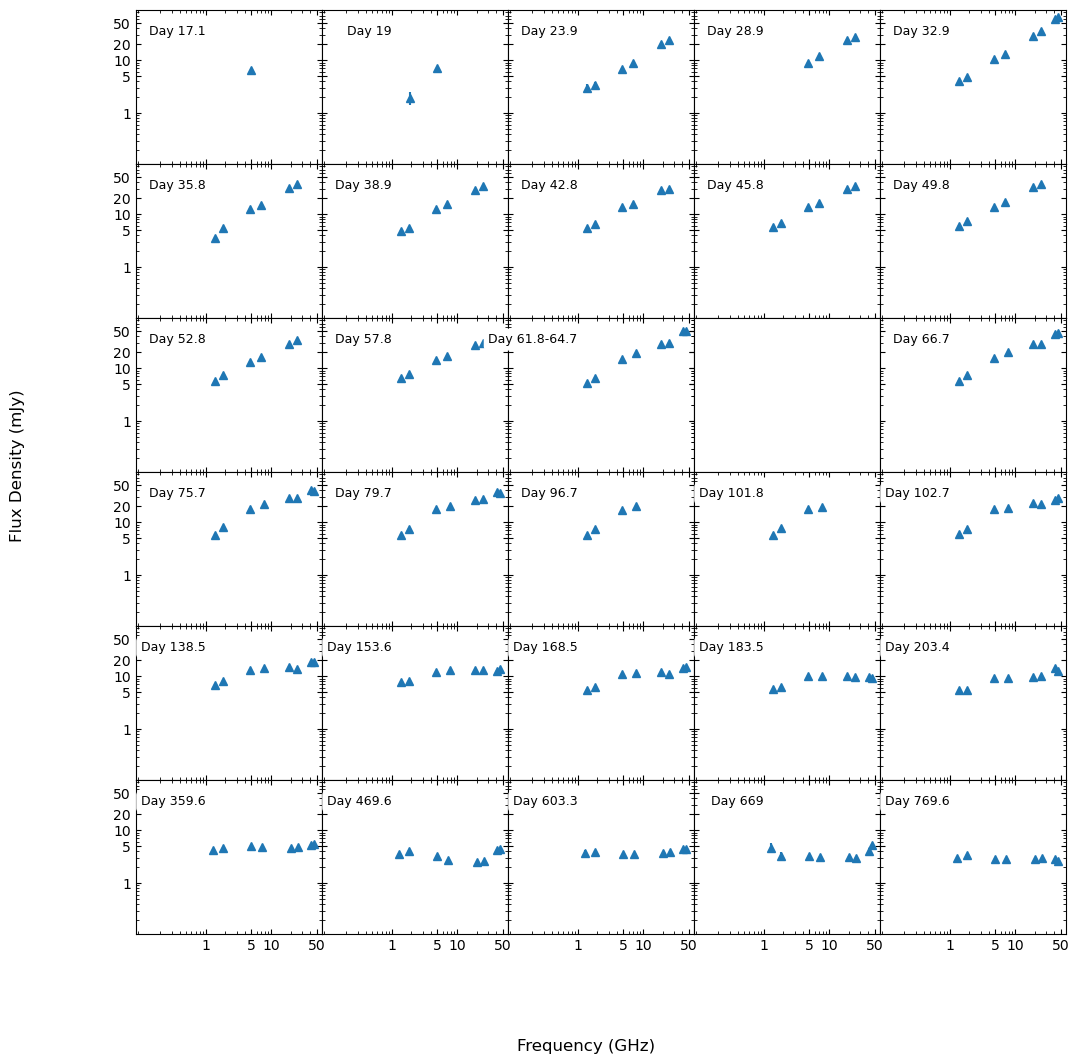

In [17]:
fig, ax = plt.subplots(6, 5, sharex='all', sharey='all',squeeze=True, width_ratios=None, height_ratios=None)
fig.set_size_inches(12,12)
fig.subplots_adjust(hspace=0, wspace=0)



ax[0, 0].errorbar(df1['Freq'], df1['Flux'], yerr=df1['Error (gaussfit or image)'],fmt='^', label='Day 17.1' )
#ax[0,0].legend(loc='upper left', edgecolor='1', markerscale = 0, handlelength=0,  handletextpad=0)
ax[0,0].set_xscale('log')
ax[0,0].set_xticks([1,5,10,50], labels = ['1','5','10','50'])
ax[0,0].set_yscale('log')
ax[0,0].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'])
ax[0,0].annotate('Day 17.1', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[0,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)


ax[0, 1].errorbar(df2['Freq'], df2['Flux'], yerr=df2['Error (gaussfit or image)'],fmt='^', label='Day 19' )
#ax[0,1].legend(loc='upper left', edgecolor='1', markerscale = 0, handlelength=0,  handletextpad=0)
ax[0,1].annotate('Day 19', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[0,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[0, 2].errorbar(df3['Freq'], df3['Flux'], yerr=df3['Error (gaussfit or image)'],fmt='^', label='Day 23.9' )
#ax[0,2].legend(loc='upper left', edgecolor='1', markerscale = 0, handlelength=0,  handletextpad=0)
ax[0,2].annotate('Day 23.9', xy=(50, 100), xycoords='axes points',size=9, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[0,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[0, 3].errorbar(df4['Freq'], df4['Flux'], yerr=df4['Error (gaussfit or image)'],fmt='^', label='Day 28.9' )
ax[0,3].annotate('Day 28.9', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[0,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[0, 4].errorbar(df5['Freq'], df5['Flux'], yerr=df5['Error (gaussfit or image)'],fmt='^', label='Day 32.9' )
ax[0,4].annotate('Day 32.9', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[0,4].tick_params(axis='both', which='both', direction='in', top=True, right=True)



ax[1, 0].errorbar(df6['Freq'], df6['Flux'], yerr=df6['Error (gaussfit or image)'],fmt='^')
ax[1,0].annotate('Day 35.8', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[1,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[1, 1].errorbar(df7['Freq'], df7['Flux'], yerr=df7['Error (gaussfit or image)'],fmt='^')
ax[1,1].annotate('Day 38.9', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[1,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[1, 2].errorbar(df8['Freq'], df8['Flux'], yerr=df8['Error (gaussfit or image)'],fmt='^')
ax[1,2].annotate('Day 42.8', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[1,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[1, 3].errorbar(df9['Freq'], df9['Flux'], yerr=df9['Error (gaussfit or image)'],fmt='^')
ax[1,3].annotate('Day 45.8', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[1,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[1, 4].errorbar(df10['Freq'], df10['Flux'], yerr=df10['Error (gaussfit or image)'],fmt='^')
ax[1,4].annotate('Day 49.8', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[1,4].tick_params(axis='both', which='both', direction='in', top=True, right=True)



ax[2, 0].errorbar(df11['Freq'], df11['Flux'], yerr=df11['Error (gaussfit or image)'],fmt='^')
ax[2,0].annotate('Day 52.8', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[2,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[2, 1].errorbar(df12['Freq'], df12['Flux'], yerr=df12['Error (gaussfit or image)'],fmt='^')
ax[2,1].annotate('Day 57.8', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[2,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[2, 2].errorbar(df13['Freq'], df13['Flux'], yerr=df13['Error (gaussfit or image)'],fmt='^')
ax[2,2].annotate('Day 61.8-64.7', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[2,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)

#ax[2, 3].errorbar(df13_2['Freq'], df13_2['Flux'], yerr=df13_2['Error (gaussfit or image)'],fmt='^')
#ax[2,3].annotate('Day 64.7', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
#ax[2,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[2, 4].errorbar(df14['Freq'], df14['Flux'], yerr=df14['Error (gaussfit or image)'],fmt='^')
ax[2,4].annotate('Day 66.7', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[2,4].tick_params(axis='both', which='both', direction='in', top=True, right=True)



ax[3, 0].errorbar(df15['Freq'], df15['Flux'], yerr=df15['Error (gaussfit or image)'],fmt='^')
ax[3,0].annotate('Day 75.7', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[3,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[3, 1].errorbar(df16['Freq'], df16['Flux'], yerr=df16['Error (gaussfit or image)'],fmt='^')
ax[3,1].annotate('Day 79.7', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[3,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[3, 2].errorbar(df17['Freq'], df17['Flux'], yerr=df17['Error (gaussfit or image)'],fmt='^')
ax[3,2].annotate('Day 96.7', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[3,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[3, 3].errorbar(df18['Freq'], df18['Flux'], yerr=df18['Error (gaussfit or image)'],fmt='^')
ax[3,3].annotate('Day 101.8', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[3,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[3, 4].errorbar(df19['Freq'], df19['Flux'], yerr=df19['Error (gaussfit or image)'],fmt='^')
ax[3,4].annotate('Day 102.7', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[3,4].tick_params(axis='both', which='both', direction='in', top=True, right=True)



ax[4, 0].errorbar(df20['Freq'], df20['Flux'], yerr=df20['Error (gaussfit or image)'],fmt='^')
ax[4,0].annotate('Day 138.5', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[4,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[4, 1].errorbar(df21['Freq'], df21['Flux'], yerr=df21['Error (gaussfit or image)'],fmt='^')
ax[4,1].annotate('Day 153.6', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[4,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[4, 2].errorbar(df22['Freq'], df22['Flux'], yerr=df22['Error (gaussfit or image)'],fmt='^')
ax[4,2].annotate('Day 168.5', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[4,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[4, 3].errorbar(df23['Freq'], df23['Flux'], yerr=df23['Error (gaussfit or image)'],fmt='^')
ax[4,3].annotate('Day 183.5', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[4,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[4, 4].errorbar(df24['Freq'], df24['Flux'], yerr=df24['Error (gaussfit or image)'],fmt='^')
ax[4,4].annotate('Day 203.4', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[4,4].tick_params(axis='both', which='both', direction='in', top=True, right=True)



ax[5, 0].errorbar(df25['Freq'], df25['Flux'], yerr=df25['Error (gaussfit or image)'],fmt='^')
ax[5,0].annotate('Day 359.6', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[5,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[5, 1].errorbar(df26['Freq'], df26['Flux'], yerr=df26['Error (gaussfit or image)'],fmt='^')
ax[5,1].annotate('Day 469.6', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[5,1].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[5, 2].errorbar(df27['Freq'], df27['Flux'], yerr=df27['Error (gaussfit or image)'],fmt='^')
ax[5,2].annotate('Day 603.3', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[5,2].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[5, 3].errorbar(df28['Freq'], df28['Flux'], yerr=df28['Error (gaussfit or image)'],fmt='^')
ax[5,3].annotate('Day 669', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[5,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)

ax[5, 4].errorbar(df29['Freq'], df29['Flux'], yerr=df29['Error (gaussfit or image)'],fmt='^')
ax[5,4].annotate('Day 769.6', xy=(50, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[5,4].tick_params(axis='both', which='both', direction='in', top=True, right=True)

#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlabel("Frequency (GHz)")
#ax.set_ylabel("Flux Density (mJy)")

fig.supxlabel("Frequency (GHz)")
fig.supylabel("Flux Density (mJy)")
#plt.legend()
plt.show();

### Now to add in the linefits
---
#### Functions needed

In [61]:
#CHI(freq_F23,fw_tBPL2(freq_F23))

#O = observed values (the measured flux densities)
#E = expected values (the modelled flux densities)


def cs(O,E):
    X=[]
    for i in range(len(E)):
        X.append(((O[i]-E[i])**2) / E[i])
    XS = np.sum(X)
        
    return(XS)

#This gives chi squared, but we want reduced chi squared so just divide by the number of free

#Xhi = cs(flux,BPL_ww(freq))
#print("The chi squared is",Xhi)

In [62]:
def error(err, freq, flux):
    yerr = []
    for i in range(len(freq)):
        if freq[i] < 10:
            pl = np.sqrt(err[i]**2 + (flux[i]*0.05)**2)
            yerr.append(pl)
        else:
            pl =np.sqrt(err[i]**2 + (flux[i]*0.1)**2)
            yerr.append(pl)

    return(yerr)

In [63]:
#Initialize fitters
fitBPL = fitting.LevMarLSQFitter(calc_uncertainties=True)

print(fitBPL.fit_info)

#A function that will produce a broken power law for given input values
#Also fits the BPL using LevMarLSQFitter 
#Issue: not all BPL's work so I get an error when trying to fit it to the data 

def bpl_func(freq, flux, er, a1, a2):
    wt = 1 / (np.power(er,2))
    peak = np.max(flux)
    BPL = []
    
    for i in range(0,len(freq)):
        for j in range(0,len(a1)):
            bro = BrokenPowerLaw1D(peak, freq[i], alpha_1 = a1[j], alpha_2 = a2[j])
            BPL.append(bro)
        
        
    return(BPL)

{'nfev': None, 'fvec': None, 'fjac': None, 'ipvt': None, 'qtf': None, 'message': None, 'ierr': None, 'param_jac': None, 'param_cov': None}


### Day 17.1, df1

In [64]:
mask = df1['Flux'] > 3 * df1['Error (gaussfit or image)']  # apply detection threshold

yerr1 = error(df1['Error (gaussfit or image)'].values.tolist(), df1['Freq'][mask].values.tolist(), df1['Flux'][mask].values.tolist())

## df_1

In [65]:
mask = df_1['Flux'] > 3 * df_1['Error (gaussfit or image)']  # apply detection threshold
if mask.any():
    x_1 = df_1['Freq'][mask].values.tolist()
    y_1 = df_1['Flux'][mask].values.tolist()
    yerr_1 = df_1['Error (gaussfit or image)'].values.tolist()

yerr_1 = error(yerr_1, x_1, y_1)

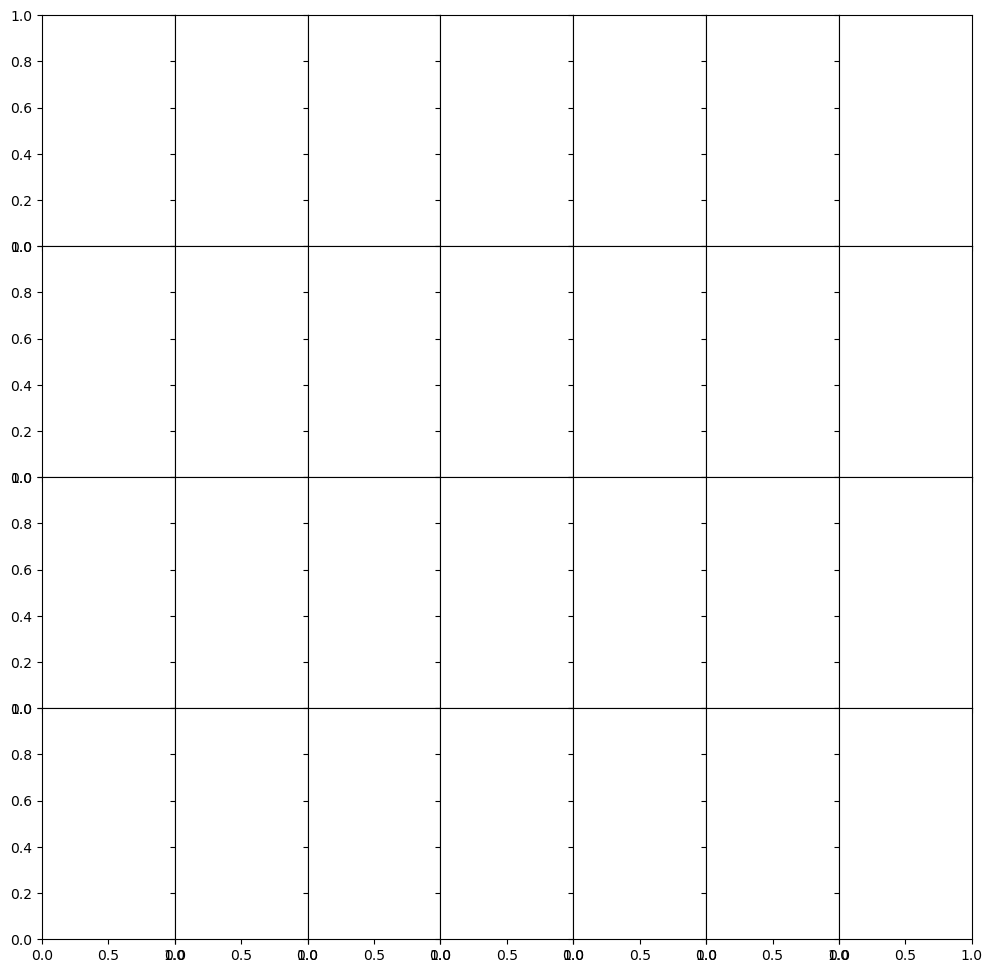

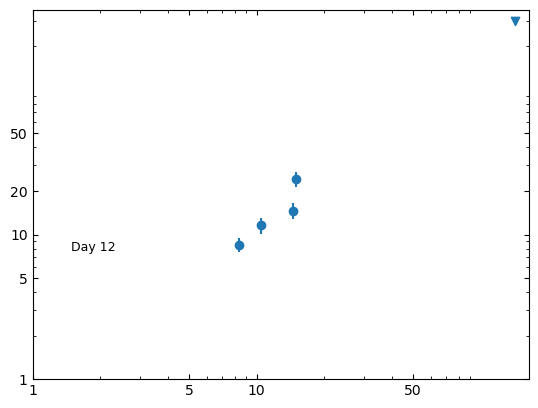

In [66]:
fig,ax = plt.subplots()
mask = df_1['Flux'] > 3 * df_1['Error (gaussfit or image)']  # apply detection threshold
mask2 = df_1['Flux'] < 3 * df_1['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df_1['Freq'][mask], df_1['Flux'][mask], yerr=yerr_1, fmt='o')
    ax.scatter(df_1['Freq'][mask2], (df_1['Flux'][mask2] + 3*df_1['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 12', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    #ax.plot(df_1['Freq'][mask], fit_model_weights2(df2['Freq'][mask]), 'r--')
    #ax.annotate('${\u03B1 = 1.34 \\pm 0.282}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

### Day 19 (df2)

In [67]:
mask = df2['Flux'] > 3 * df2['Error (gaussfit or image)']  # apply detection threshold
if mask.any():
    x2 = df2['Freq'][mask].values.tolist()
    y2 = df2['Flux'][mask].values.tolist()
    yerr2 = df2['Error (gaussfit or image)'].values.tolist()

In [68]:
yerr2 = error(yerr2, x2, y2)

In [69]:
#Since this day has only two data points, I have to make x_0 fixed in order to run the powerlaw1d. 
#this is done in the code below so I can use the function for the rest of the points

PL2 =  PowerLaw1D(amplitude = y2[0], x_0= x2[0], alpha= -1.4,
                     bounds={
        'amplitude': (0, None),  # Amplitude should be positive
        #'x_0': (x3[0], x3[0]),  # Frequency must stay within data
        'alpha': (-10, 10)  # Keep alpha within a realistic range
    },
                 fixed={'x_0': True}) 

    #Initialize fitters
    #setting calc_uncertainties=True to output errors on measurement 

fit = fitting.LevMarLSQFitter(calc_uncertainties=True)

    #Fit the data w/o weights
fit_model2 = fit(PL2, x2, y2)

    #weight is 1/error^2
y_weight2 = 1/ (np.power(yerr2,2))  

    # fit the data using the uncertainties as weights
fit_model_weights2 = fit(PL2, x2, y2, weights=y_weight2)

fit_model_weights2


<PowerLaw1D(amplitude=1.93, x_0=1.9, alpha=-1.33656147)>

In [70]:
#Error on alpha for only two data points
def two_points(Flux, Freq, Err):
    
    alpha = (np.log10(Flux[0]/Flux[1])) / (np.log10(Freq[0]/Freq[1]))
    
    
    der_s1 = 1 / (Flux[0] * np.log(Freq[0]/Freq[1]))
    der_s2 = -1 / (Flux[1] * np.log(Freq[0]/Freq[1]))
    
    
    err_alph_squared = (der_s1)**2 * (Err[0]**2) + (der_s2)**2 * (Err[1]**2) 
    err_alph = np.sqrt(err_alph_squared)
    
    return(alpha, err_alph)

In [71]:
alpha_err2 = two_points(y2,x2,yerr2)
print(alpha_err2)

(1.3365614727347834, 0.2908787235236457)


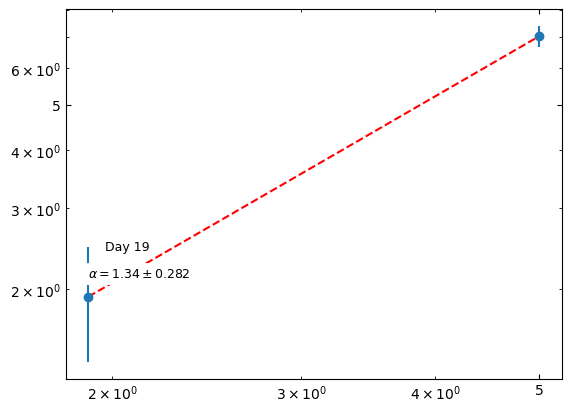

In [72]:
fig,ax = plt.subplots()
mask = df2['Flux'] > 3 * df2['Error (gaussfit or image)']  # apply detection threshold
mask2 = df2['Flux'] < 3 * df2['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df2['Freq'][mask], df2['Flux'][mask], yerr=yerr2, fmt='o')
    ax.scatter(df2['Freq'][mask2], (df2['Flux'][mask2] + 3*df2['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 19', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df2['Freq'][mask], fit_model_weights2(df2['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 1.34 \\pm 0.282}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

### Day 23.9 (df3)

In [73]:
x3= df3['Freq'].values.tolist()
y3 = df3['Flux'].values.tolist()
yerr3=df3['Error (gaussfit or image)'].values.tolist()

In [74]:
yerr3 = error(yerr3, x3, y3)

In [75]:


PL =  PowerLaw1D(amplitude = y3[0], x_0= x3[0], alpha= .5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model = fit(PL, x3, y3)


#weight is 1/error^2
x_weight = 1/ (np.power(yerr3,2))  

# fit the data using the uncertainties as weights
fit_model_weights = fit(PL, x3, y3, weights=x_weight)

fit_model_weights


<PowerLaw1D(amplitude=5.35795242, x_0=3.36233289, alpha=-0.69011005)>

In [76]:
fit.fit_info

{'nfev': 22,
 'fvec': array([-0.19519163,  0.07974287, -0.22187406,  0.37494948, -0.66231396,
        -0.52276837]),
 'fjac': array([[-4.14783044e+01, -9.43017336e+00,  8.57517869e+00,
         -7.62171326e-01, -1.75881924e-01, -1.71675862e-01],
        [-9.43017336e+00,  1.12040394e+01, -1.01882156e+01,
          3.89364079e-01, -1.52335394e-02, -2.51729589e-02],
        [ 8.57517869e+00, -1.01882156e+01,  2.01471833e-15,
          8.81689918e-01,  9.64348348e-02,  1.37764050e-01]]),
 'ipvt': array([3, 2, 1], dtype=int32),
 'qtf': array([ 1.55563896e-05, -1.84825928e-05,  1.01347142e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[2.46360640e+29, 2.24024144e+29, 3.04866634e+12],
        [2.24024144e+29, 2.03712805e+29, 2.77225642e+12],
        [3.04866634e+12, 2.77225642e+12, 1.03073379e-03]]),
 'njev': 12,
 'cov_x': array([[2.46360640e+29, 2.24024144e+29, 3.04866634e

In [77]:
fvec3 = np.array([-0.19519163,  0.07974287, -0.22187406,  0.37494948, -0.66231396,
        -0.52276837])
var3 = np.var(fvec3)

param_cov= np.array([[2.46360640e+29, 2.24024144e+29, 3.04866634e+12],
        [2.24024144e+29, 2.03712805e+29, 2.77225642e+12],
        [3.04866634e+12, 2.77225642e+12, 1.03073379e-03]])
#This function takes the square root of the diagonal of the matrix 

#The diagonal elements of a covariance matrix are the variances: https://stackoverflow.com/questions/52275542/how-to-calculate-the-standard-error-from-a-variance-covariance-matrix 
#The square root of them are the standard deviations

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag = stand(param_cov*var3) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print(diag[2]) #Just showing the standard devation on the slope


0.011173739180395017


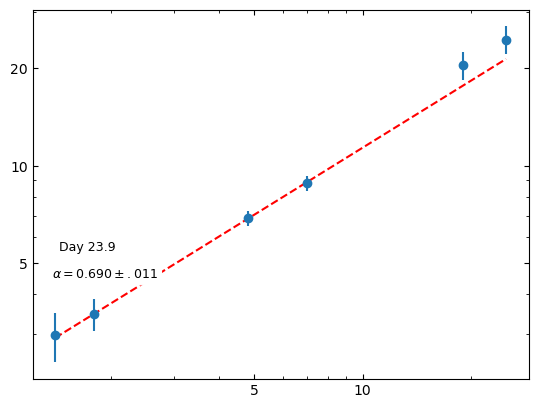

In [78]:
fig,ax = plt.subplots()
mask = df3['Flux'] > 3 * df3['Error (gaussfit or image)']  # apply detection threshold
mask2 = df3['Flux'] < 3 * df3['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df3['Freq'][mask], df3['Flux'][mask], yerr=yerr3, fmt='o')
    ax.scatter(df3['Freq'][mask2], (df3['Flux'][mask2] + 3*df3['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 23.9', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df3['Freq'][mask], fit_model_weights(df3['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.690 \\pm .011}$', xy=(90, 80), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

### Day 28.9 (df4)

In [79]:
x4= df4['Freq'].values.tolist()
y4 = df4['Flux'].values.tolist()
yerr4=df4['Error (gaussfit or image)'].values.tolist()

In [80]:
yerr4 = error(yerr4, x4, y4)

In [81]:


PL4 =  PowerLaw1D(amplitude = y4[0], x_0= x4[0], alpha= -4.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit4 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model4 = fit4(PL4, x4, y4)


#weight is 1/error^2
y_weight4 = 1/ (np.power(yerr4, 2))  

# fit the data using the uncertainties as weights
fit_model_weights4 = fit4(PL4, x4, y4, weights=y_weight4)

fit_model_weights4


<PowerLaw1D(amplitude=29.40647597, x_0=24.88294747, alpha=-0.71866879)>

In [82]:
fit4.fit_info

{'nfev': 19,
 'fvec': array([ 0.23433851,  0.10188078, -0.16853495,  0.102142  ]),
 'fjac': array([[ 7.95647457e+01,  1.78054286e+00, -1.51224577e+00,
         -8.51310754e-01],
        [ 1.78054286e+00, -2.82004814e-01,  2.39511552e-01,
         -1.59994324e-02],
        [-1.51224577e+00,  2.39511552e-01,  2.54785942e-16,
         -9.94048673e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([ 6.80236187e-06, -1.07719378e-06,  3.13121446e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.11119164e+31,  1.30833518e+31, -3.74708070e+13],
        [ 1.30833518e+31,  1.54045521e+31, -4.41187401e+13],
        [-3.74708070e+13, -4.41187401e+13,  6.58156374e-03]]),
 'njev': 11,
 'cov_x': array([[ 1.11119164e+31,  1.30833518e+31, -3.74708070e+13],
        [ 1.30833518e+31,  1.54045521e+31, -4.41187401e+13],
        [-3.74708070e+13, -4.41187401e+13,  6.58156374e-0

In [83]:
fvec4 = np.array([ 0.23433851,  0.10188078, -0.16853495,  0.102142  ])
var4 = np.var(fvec4)

param_cov4= np.array([[ 1.11119164e+31,  1.30833518e+31, -3.74708070e+13],
        [ 1.30833518e+31,  1.54045521e+31, -4.41187401e+13],
        [-3.74708070e+13, -4.41187401e+13,  6.58156374e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag4 = stand(param_cov4*var4) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print(diag4[2]) #Just showing the standard devation on the slope


0.011890665425042057


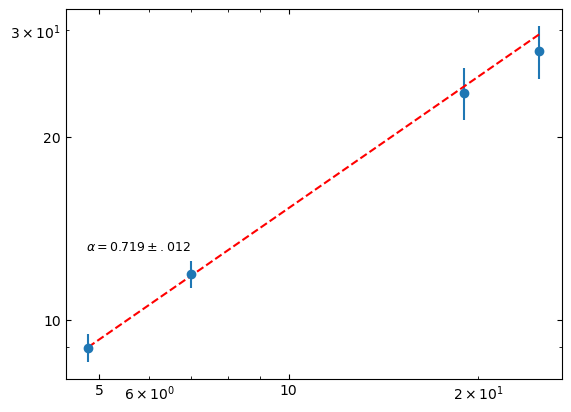

In [84]:
fig,ax = plt.subplots()
mask = df4['Flux'] > 3 * df4['Error (gaussfit or image)']  # apply detection threshold
mask2 = df4['Flux'] < 3 * df4['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df4['Freq'][mask], df4['Flux'][mask], yerr=yerr4, fmt='o')
    ax.scatter(df4['Freq'][mask2], (df4['Flux'][mask2] + 3*df4['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 28.9', xy=(60, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df4['Freq'][mask], fit_model_weights4(df4['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.719 \\pm .012}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

### Day 32.9 (df5)

In [85]:
x5= df5['Freq'].values.tolist()
y5 = df5['Flux'].values.tolist()
yerr5=df5['Error (gaussfit or image)'].values.tolist()

In [86]:
yerr5 = error(yerr5, x5, y5)

In [87]:


PL5 =  PowerLaw1D(amplitude = y5[0], x_0= x5[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit5 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model5 = fit5(PL5, x5, y5)


#weight is 1/error^2
y_weight5 = 1/ (np.power(yerr5, 2))  

# fit the data using the uncertainties as weights
fit_model_weights5 = fit5(PL5, x5, y5, weights=y_weight5)

fit_model_weights5

<PowerLaw1D(amplitude=63.87339453, x_0=55.30763914, alpha=-0.75226882)>

In [88]:
fit5.fit_info

{'nfev': 24,
 'fvec': array([-0.24621005, -0.24264476, -0.01050243, -0.06291996,  1.43001824,
        -1.76035613,  0.64323626, -0.15441463]),
 'fjac': array([[-1.91754615e+02, -9.87504830e-01,  8.57748219e-01,
          1.87840101e-02,  3.35431249e-01,  4.35689066e-01,
          5.91480106e-01,  5.89335119e-01],
        [-9.87504830e-01, -2.29327264e-01,  1.99194015e-01,
          1.47469764e-01,  6.51612738e-01,  4.21023237e-01,
         -3.34490201e-01, -4.87084956e-01],
        [ 8.57748219e-01,  1.99194015e-01, -5.39719283e-17,
          6.42824347e-02, -5.14259477e-01, -7.71389216e-01,
         -2.57129739e-01, -2.57129739e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-9.30065734e-05, -2.15993748e-05, -1.96954424e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[2.59003316e+32, 2.98184269e+32, 3.83708318e+14],
        [2.98184269e+32, 3.43292354e+

In [89]:
fvec5 = np.array([-0.24621005, -0.24264476, -0.01050243, -0.06291996,  1.43001824,
        -1.76035613,  0.64323626, -0.15441463])
var5 = np.var(fvec5)

param_cov5= np.array([[2.59003316e+32, 2.98184269e+32, 3.83708318e+14],
        [2.98184269e+32, 3.43292354e+32, 4.41754129e+14],
        [3.83708318e+14, 4.41754129e+14, 1.09993681e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag5 = stand(param_cov5*var5) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print(diag5[2]) #Just showing the standard devation on the slope


0.02795685521986715


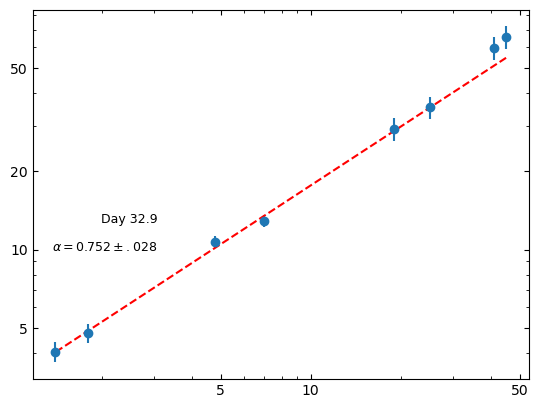

In [90]:
fig,ax = plt.subplots()
mask = df5['Flux'] > 3 * df5['Error (gaussfit or image)']  # apply detection threshold
mask2 = df5['Flux'] < 3 * df5['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df5['Freq'][mask], df5['Flux'][mask], yerr=yerr5, fmt='o')
    ax.scatter(df5['Freq'][mask2], (df5['Flux'][mask2] + 3*df5['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 32.9', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df5['Freq'][mask], fit_model_weights5(df5['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.752 \\pm .028}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();

### Day 35.8 (df6)

In [91]:
x6= df6['Freq'].values.tolist()
y6 = df6['Flux'].values.tolist()
yerr6=df6['Error (gaussfit or image)'].values.tolist()

In [92]:
yerr6 = error(yerr6, x6, y6)

In [93]:

PL6 =  PowerLaw1D(amplitude = y6[0], x_0= x6[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit6 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model6 = fit6(PL6, x6, y6)


#weight is 1/error^2
y_weight6 = 1/ (np.power(yerr6, 2))  

# fit the data using the uncertainties as weights
fit_model_weights6 = fit6(PL6, x6, y6, weights=y_weight6)

fit_model_weights6

<PowerLaw1D(amplitude=45.46169196, x_0=24.69238426, alpha=-0.84314276)>

In [94]:
fit6.fit_info

{'nfev': 20,
 'fvec': array([ 0.62742077,  0.58075452,  1.88172948, -2.2562101 , -2.84507172,
         3.15887715]),
 'fjac': array([[ 1.27905675e+02, -1.87980128e+00,  1.21053775e+00,
         -3.51907295e-01, -6.20745488e-01, -6.41826238e-01],
        [-1.87980128e+00,  6.11829767e-01, -3.94000704e-01,
          5.23424486e-01, -9.43777859e-02, -2.51357659e-01],
        [ 1.21053775e+00, -3.94000704e-01,  1.73472348e-16,
          1.60000000e-01, -9.20000000e-01, -1.60000000e-01]]),
 'ipvt': array([3, 2, 1], dtype=int32),
 'qtf': array([ 3.45969580e-04, -1.12816618e-04, -1.79500497e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[3.32306999e+31, 2.13996112e+31, 2.06690184e+14],
        [2.13996112e+31, 1.37807317e+31, 1.33102510e+14],
        [2.06690184e+14, 1.33102510e+14, 1.92371809e-03]]),
 'njev': 12,
 'cov_x': array([[3.32306999e+31, 2.13996112e+31, 2.06690184e

In [95]:
#taking fvec
fvec6 = np.array([ 0.62742077,  0.58075452,  1.88172948, -2.2562101 , -2.84507172,
         3.15887715])
var6 = np.var(fvec6)

#taking paramcov
param_cov6= np.array([[3.32306999e+31, 2.13996112e+31, 2.06690184e+14],
        [2.13996112e+31, 1.37807317e+31, 1.33102510e+14],
        [2.06690184e+14, 1.33102510e+14, 1.92371809e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag6 = stand(param_cov6*var6) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print(diag6[2]) #Just showing the standard deviation on the slope



0.09341264077931907


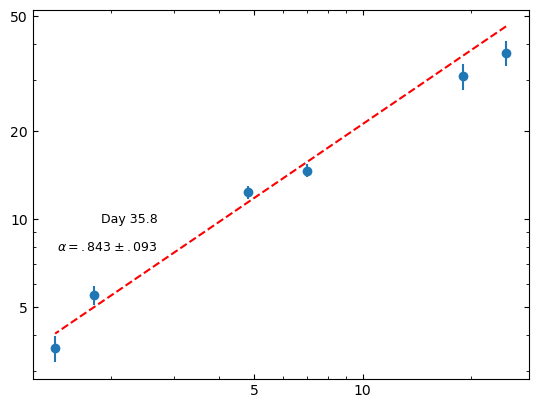

In [96]:
#plotting to check
fig,ax = plt.subplots()
mask = df6['Flux'] > 3 * df6['Error (gaussfit or image)']  # apply detection threshold
mask2 = df6['Flux'] < 3 * df6['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df6['Freq'][mask], df6['Flux'][mask], yerr=yerr6, fmt='o')
    ax.scatter(df6['Freq'][mask2], (df6['Flux'][mask2] + 3*df6['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 35.8', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df6['Freq'][mask], fit_model_weights6(df6['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = .843 \\pm .093}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 38.9 (df7)

In [97]:
x7 = df7['Freq'].values.tolist()
y7 = df7['Flux'].values.tolist()
yerr7 =df7['Error (gaussfit or image)'].values.tolist()

In [98]:
yerr7 = error(yerr7, x7, y7)

In [99]:


PL7 =  PowerLaw1D(amplitude = y7[0], x_0= x7[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit7 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model7 = fit7(PL7, x7, y7)


#weight is 1/error^2
y_weight7 = 1/ (np.power(yerr7, 2))  

# fit the data using the uncertainties as weights
fit_model_weights7 = fit7(PL7, x7, y7, weights=y_weight7)

fit_model_weights7


<PowerLaw1D(amplitude=19.71592194, x_0=9.12979853, alpha=-0.76177124)>

In [100]:
fit7.fit_info

{'nfev': 19,
 'fvec': array([ 0.68658397,  0.62317496,  0.82457972, -1.62629335,  1.06326982,
        -0.3679479 ]),
 'fjac': array([[ 7.87697224e+01, -4.15874950e+00,  2.52803040e+00,
         -2.25662527e-01, -5.94461187e-01, -7.64654647e-01],
        [-4.15874950e+00,  2.40344158e+00, -1.46100970e+00,
          6.13360124e-01,  8.84754177e-02, -5.87911075e-02],
        [ 2.52803040e+00, -1.46100970e+00,  4.68568046e-16,
          2.36939551e-01, -3.55409327e-01,  7.70053541e-01]]),
 'ipvt': array([3, 2, 1], dtype=int32),
 'qtf': array([ 1.09007553e-05, -6.29938569e-06,  5.59421515e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 4.55464637e+30,  2.76868911e+30, -3.25093560e+13],
        [ 2.76868911e+30,  1.68303723e+30, -1.97618635e+13],
        [-3.25093560e+13, -1.97618635e+13,  8.75755675e-04]]),
 'njev': 11,
 'cov_x': array([[ 4.55464637e+30,  2.76868911e+30, 

In [101]:
#taking fvec
fvec7 = np.array([0.68658397,  0.62317496,  0.82457972, -1.62629335,  1.06326982,
        -0.3679479 ])
var7 = np.var(fvec7)

#taking cov_x
cov_x7 = np.array([[ 4.55464637e+30,  2.76868911e+30, -3.25093560e+13],
        [ 2.76868911e+30,  1.68303723e+30, -1.97618635e+13],
        [-3.25093560e+13, -1.97618635e+13,  8.75755675e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag7 = stand(cov_x7*var7) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print(diag7[2]) #Just showing the standard deviation on the slope


0.027573799690408678


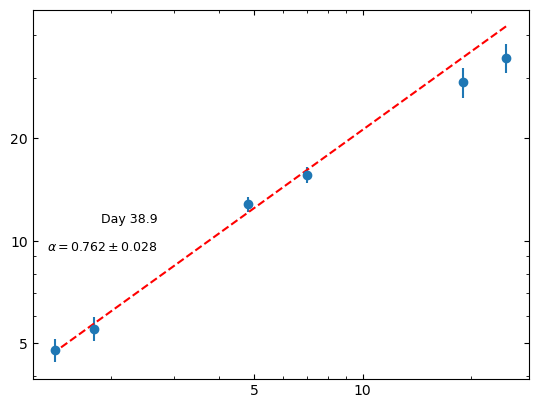

In [102]:
#plotting to check
fig,ax = plt.subplots()
mask = df7['Flux'] > 3 * df7['Error (gaussfit or image)']  # apply detection threshold
mask2 = df7['Flux'] < 3 * df7['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df7['Freq'][mask], df7['Flux'][mask], yerr=yerr7, fmt='o')
    ax.scatter(df7['Freq'][mask2], (df7['Flux'][mask2] + 3*df7['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 38.9', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df7['Freq'][mask], fit_model_weights7(df7['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.762 \\pm 0.028}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 42.8 (df8)

In [103]:
x8 = df8['Freq'].values.tolist()
y8 = df8['Flux'].values.tolist()
yerr8 = df8['Error (gaussfit or image)'].values.tolist()


In [104]:
yerr8 = error(yerr8, x8, y8)

In [105]:

PL8 =  PowerLaw1D(amplitude = y8[0], x_0= x8[0], alpha= -.65) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit8 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model8 = fit8(PL8, x8, y8)


#weight is 1/error^2
y_weight8 = 1/ (np.power(yerr8, 2))  

# fit the data using the uncertainties as weights
fit_model_weights8 = fit8(PL8, x8, y8, weights=y_weight8)

fit_model_weights8


<PowerLaw1D(amplitude=107.21736569, x_0=115.1120357, alpha=-0.6700956)>

In [106]:
fit8.fit_info

{'nfev': 13,
 'fvec': array([ 0.88340032,  0.37410519,  1.11795486, -1.88225901, -0.23840742,
         0.62482048]),
 'fjac': array([[-2.23430144e+02, -5.36278702e-01,  3.34712333e-01,
          3.64326283e-01,  5.59489315e-01,  6.67497869e-01],
        [-5.36278702e-01, -9.81326923e-02,  6.12484185e-02,
          3.59292544e-01, -3.30293213e-01, -5.88345824e-01],
        [ 3.34712333e-01,  6.12484185e-02, -3.95577815e-17,
          8.77058019e-02, -8.77058019e-02,  7.01646415e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-2.07784733e-05, -3.96748296e-06, -4.70263038e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 2.48942172e+32,  3.98857084e+32, -6.87865905e+14],
        [ 3.98857084e+32,  6.39051921e+32, -1.10210410e+15],
        [-6.87865905e+14, -1.10210410e+15,  2.51894471e-03]]),
 'njev': 6,
 'cov_x': array([[ 2.48942172e+32,  3.98857084e+32, -

In [107]:
#taking fvec
fvec8 = np.array([ 0.88340032,  0.37410519,  1.11795486, -1.88225901, -0.23840742,
         0.62482048])
var8 = np.var(fvec8)

#taking cov_x
cov_x8 = np.array([[ 2.48942172e+32,  3.98857084e+32, -6.87865905e+14],
        [ 3.98857084e+32,  6.39051921e+32, -1.10210410e+15],
        [-6.87865905e+14, -1.10210410e+15,  2.51894471e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag8 = stand(cov_x8*var8) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error / standard deviation is', diag8[2]) #Just showing the standard deviation on the slope


The error / standard deviation is 0.05032007113555803


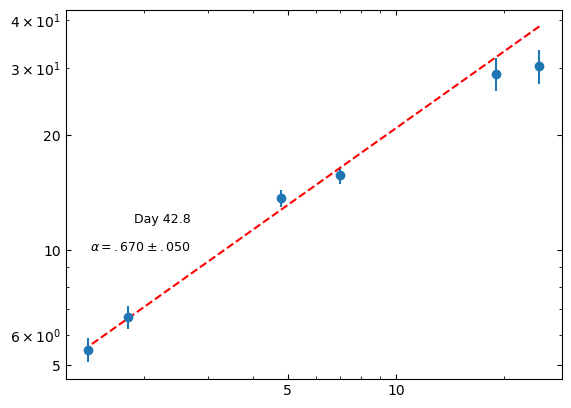

In [108]:
#plotting to check
fig,ax = plt.subplots()
mask = df8['Flux'] > 3 * df8['Error (gaussfit or image)']  # apply detection threshold
mask2 = df8['Flux'] < 3 * df8['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df8['Freq'][mask], df8['Flux'][mask], yerr=yerr8, fmt='o')
    ax.scatter(df8['Freq'][mask2], (df8['Flux'][mask2] + 3*df8['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 42.8', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df8['Freq'][mask], fit_model_weights8(df8['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = .670 \\pm .050}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 45.8 (df9)

In [109]:
x9 = df9['Freq'].values.tolist()
y9 = df9['Flux'].values.tolist()
yerr9 = df9['Error (gaussfit or image)'].values.tolist()

In [110]:
yerr9 = error(yerr9, x9, y9)

In [111]:


PL9 =  PowerLaw1D(amplitude = y9[0], x_0= x9[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit9 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model9 = fit9(PL9, x9, y9)


#weight is 1/error^2
y_weight9 = 1/ (np.power(yerr9, 2))  

# fit the data using the uncertainties as weights
fit_model_weights9 = fit9(PL9, x9, y9, weights=y_weight9)

fit_model_weights9


<PowerLaw1D(amplitude=28.78448582, x_0=15.81224954, alpha=-0.65896798)>

In [112]:
fit9.fit_info

{'nfev': 19,
 'fvec': array([ 0.44235221,  0.22798211,  1.15686525, -1.70740621,  0.16453981,
         0.24620962]),
 'fjac': array([[ 1.11545760e+02, -2.29937152e+00,  1.91743502e+00,
         -2.84357451e-01, -6.47304727e-01, -6.81292515e-01],
        [-2.29937152e+00,  8.67263478e-01, -7.23206909e-01,
          5.78391846e-01,  5.88267234e-03, -1.67707349e-01],
        [ 1.91743502e+00, -7.23206909e-01, -2.50016927e-16,
          4.44059144e-01,  4.16305447e-02,  7.77103501e-01]]),
 'ipvt': array([3, 2, 1], dtype=int32),
 'qtf': array([ 1.59814182e-04, -6.03399996e-05, -1.98239784e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[1.59978336e+31, 1.33405177e+31, 9.60651430e+13],
        [1.33405177e+31, 1.11245946e+31, 8.01082681e+13],
        [9.60651430e+13, 8.01082681e+13, 1.22218011e-03]]),
 'njev': 10,
 'cov_x': array([[1.59978336e+31, 1.33405177e+31, 9.60651430e

In [113]:
#taking fvec
fvec9 = np.array([ 0.44235221,  0.22798211,  1.15686525, -1.70740621,  0.16453981,
         0.24620962])
var9 = np.var(fvec9)

#taking cov_x
cov_x9 = np.array([[1.59978336e+31, 1.33405177e+31, 9.60651430e+13],
        [1.33405177e+31, 1.11245946e+31, 8.01082681e+13],
        [9.60651430e+13, 8.01082681e+13, 1.22218011e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag9 = stand(cov_x9*var9) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag9[2]) #Just showing the standard deviation on the slope


The error/standard deviation is 0.030416956481627695


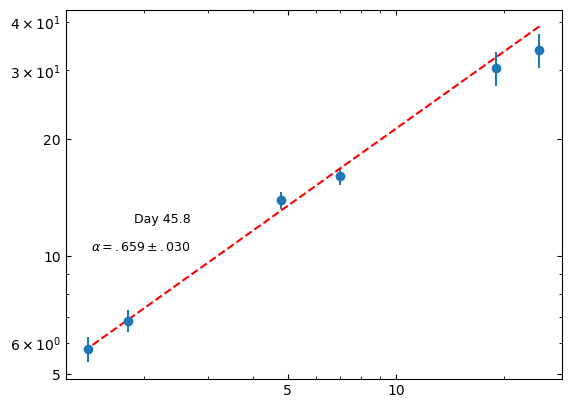

In [114]:
#plotting to check
fig,ax = plt.subplots()
mask = df9['Flux'] > 3 * df9['Error (gaussfit or image)']  # apply detection threshold
mask2 = df9['Flux'] < 3 * df9['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df9['Freq'][mask], df9['Flux'][mask], yerr=yerr9, fmt='o')
    ax.scatter(df9['Freq'][mask2], (df9['Flux'][mask2] + 3*df9['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 45.8', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df9['Freq'][mask], fit_model_weights9(df9['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = .659 \\pm .030}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 49.8 (df10)

In [115]:
mask = df10['Flux'] > 3 * df10['Error (gaussfit or image)']  # apply detection threshold

x10 = df10['Freq'][mask].values.tolist()
y10 = df10['Flux'][mask].values.tolist()
yerr10 = df10['Error (gaussfit or image)'][mask].values.tolist()

In [116]:
yerr10 = error(yerr10, x10, y10)

In [117]:


PL10 =  PowerLaw1D(amplitude = y10[0], x_0= x10[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit10 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model10 = fit10(PL10, x10, y10)


#weight is 1/error^2
y_weight10 = 1/ (np.power(yerr10, 2))  

# fit the data using the uncertainties as weights
fit_model_weights10 = fit10(PL10, x10, y10, weights=y_weight10)

fit_model_weights10


<PowerLaw1D(amplitude=34.58528822, x_0=20.44223075, alpha=-0.64902691)>

In [118]:
fit10.fit_info

{'nfev': 22,
 'fvec': array([ 0.13533984, -0.00463581,  0.51246781, -0.35263853, -1.04947639,
         0.8058799 ]),
 'fjac': array([[ 1.39481606e+02, -1.90891641e+00,  1.73889077e+00,
         -2.93128060e-01, -5.65644845e-01, -7.48447405e-01],
        [-1.90891641e+00,  5.80643596e-01, -5.28926139e-01,
          6.25831599e-01,  7.68622544e-03, -2.09747408e-01],
        [ 1.73889077e+00, -5.28926139e-01, -2.68254668e-16,
          6.20803563e-01, -4.97936191e-01,  5.69069933e-01]]),
 'ipvt': array([3, 2, 1], dtype=int32),
 'qtf': array([ 1.00755603e-04, -3.06523830e-05, -9.19004453e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[1.38964998e+31, 1.26587497e+31, 5.06284922e+12],
        [1.26587497e+31, 1.15312451e+31, 4.61190532e+12],
        [5.06284922e+12, 4.61190532e+12, 6.08791699e-04]]),
 'njev': 12,
 'cov_x': array([[1.38964998e+31, 1.26587497e+31, 5.06284922e

In [119]:
#taking fvec
fvec10 = np.array([ 0.13533984, -0.00463581,  0.51246781, -0.35263853, -1.04947639,
         0.8058799 ])
var10 = np.var(fvec10)

#taking cov_x
cov_x10 = np.array([[1.38964998e+31, 1.26587497e+31, 5.06284922e+12],
        [1.26587497e+31, 1.15312451e+31, 4.61190532e+12],
        [5.06284922e+12, 4.61190532e+12, 6.08791699e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag10 = stand(cov_x10*var10) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag10[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.014789793543899869


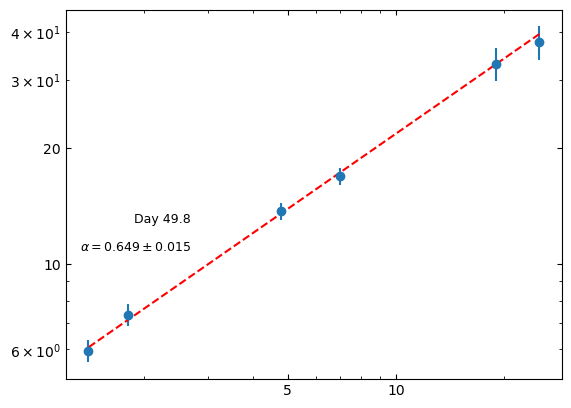

In [120]:
#plotting to check
fig,ax = plt.subplots()
mask = df10['Flux'] > 3 * df10['Error (gaussfit or image)']  # apply detection threshold
mask2 = df10['Flux'] < 3 * df10['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df10['Freq'][mask], df10['Flux'][mask], yerr=yerr10, fmt='o')
    ax.scatter(df10['Freq'][mask2], (df10['Flux'][mask2] + 3*df10['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 49.8', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df10['Freq'][mask], fit_model_weights10(df10['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.649 \\pm 0.015}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 52.8 (df11)

In [121]:
mask = df11['Flux'] > 3 * df11['Error (gaussfit or image)']  # apply detection threshold

x11 = df11['Freq'][mask].values.tolist()
y11 = df11['Flux'][mask].values.tolist()
yerr11 = df11['Error (gaussfit or image)'][mask].values.tolist()

In [122]:
yerr11 = error(yerr11, x11, y11)

In [123]:


PL11 =  PowerLaw1D(amplitude = y11[0], x_0= x11[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit11 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model11 = fit11(PL11, x11, y11)


#weight is 1/error^2
y_weight11 = 1/ (np.power(yerr11, 2))  

# fit the data using the uncertainties as weights
fit_model_weights11 = fit11(PL11, x11, y11, weights=y_weight11)

fit_model_weights11


<PowerLaw1D(amplitude=18.59781794, x_0=8.48923292, alpha=-0.62528412)>

In [124]:
fit11.fit_info

{'nfev': 21,
 'fvec': array([ 0.14776609,  0.20222577,  0.58173035, -0.25565745, -2.05705554,
         1.64845484]),
 'fjac': array([[ 8.72973329e+01, -4.12587947e+00,  3.01098128e+00,
         -1.89455447e-01, -6.03728802e-01, -7.70735104e-01],
        [-4.12587947e+00,  2.23076890e+00, -1.62796889e+00,
          6.40447503e-01,  1.05349927e-01, -6.56003699e-02],
        [ 3.01098128e+00, -1.62796889e+00,  6.29262423e-16,
          3.52864873e-01,  2.20540546e-01,  5.73405419e-01]]),
 'ipvt': array([3, 2, 1], dtype=int32),
 'qtf': array([ 1.26628496e-04, -6.84651399e-05, -7.86130756e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[2.52543622e+30, 1.84301098e+30, 1.14683521e+13],
        [1.84301098e+30, 1.34499120e+30, 8.36936556e+12],
        [1.14683521e+13, 8.36936556e+12, 6.32170186e-04]]),
 'njev': 12,
 'cov_x': array([[2.52543622e+30, 1.84301098e+30, 1.14683521e

In [125]:
#taking fvec
fvec11 = np.array([ 0.14776609,  0.20222577,  0.58173035, -0.25565745, -2.05705554,
         1.64845484])
var11 = np.var(fvec11)

#taking cov_x
cov_x11 = np.array([[2.52543622e+30, 1.84301098e+30, 1.14683521e+13],
        [1.84301098e+30, 1.34499120e+30, 8.36936556e+12],
        [1.14683521e+13, 8.36936556e+12, 6.32170186e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag11 = stand(cov_x11*var11) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag11[2]) #Just showing the standard deviation on the slope


The error/standard deviation is 0.027929214307167414


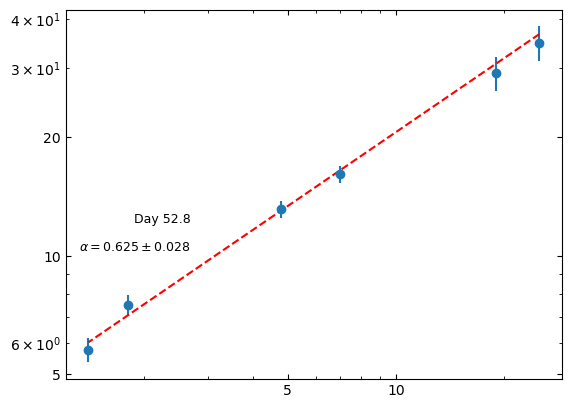

In [126]:
#plotting to check
fig,ax = plt.subplots()
mask = df11['Flux'] > 3 * df11['Error (gaussfit or image)']  # apply detection threshold
mask2 = df11['Flux'] < 3 * df11['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df11['Freq'][mask], df11['Flux'][mask], yerr=yerr11, fmt='o')
    ax.scatter(df11['Freq'][mask2], (df11['Flux'][mask2] + 3*df11['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 52.8', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df11['Freq'][mask], fit_model_weights11(df11['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.625 \\pm 0.028}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 57.8 (df12)

In [127]:
mask = df12['Flux'] > 3 * df12['Error (gaussfit or image)']  # apply detection threshold

x12 = df12['Freq'][mask].values.tolist()
y12 = df12['Flux'][mask].values.tolist()
yerr12 = df12['Error (gaussfit or image)'][mask].values.tolist()

In [128]:
yerr12 = error(yerr12, x12, y12)

In [129]:


PL12 =  PowerLaw1D(amplitude = y12[0], x_0= x12[0], alpha= -1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit12 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model12 = fit12(PL12, x12, y12)


#weight is 1/error^2
y_weight12 = 1/ (np.power(yerr12, 2))  

# fit the data using the uncertainties as weights
fit_model_weights12 = fit12(PL12, x12, y12, weights=y_weight12)

fit_model_weights12


<PowerLaw1D(amplitude=47.09792039, x_0=36.24162599, alpha=-0.60748667)>

In [130]:
fit12.fit_info

{'nfev': 18,
 'fvec': array([ 0.92991752,  0.5234107 ,  0.22627921, -0.72162883, -0.21866847,
         0.43317177]),
 'fjac': array([[-1.56474167e+02, -1.18775083e+00,  9.37683243e-01,
          3.50086344e-01,  5.70900758e-01,  7.00403678e-01],
        [-1.18775083e+00, -3.06708843e-01,  2.42134742e-01,
          4.30252456e-01, -2.97686128e-01, -5.60389155e-01],
        [ 9.37683243e-01,  2.42134742e-01, -1.27946882e-16,
         -7.59256602e-01,  0.00000000e+00, -6.50791373e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-3.91754328e-05, -1.01161383e-05, -9.14375538e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[3.80716948e+31, 4.82249071e+31, 2.69867932e+13],
        [4.82249071e+31, 6.10858454e+31, 3.41838104e+13],
        [2.69867932e+13, 3.41838104e+13, 6.72481539e-04]]),
 'njev': 12,
 'cov_x': array([[3.80716948e+31, 4.82249071e+31, 2.69867932e

In [131]:
#taking fvec
fvec12 = np.array([ 0.92991752,  0.5234107 ,  0.22627921, -0.72162883, -0.21866847,
         0.43317177])
var12 = np.var(fvec12)

#taking cov_x
cov_x12 = np.array([[3.80716948e+31, 4.82249071e+31, 2.69867932e+13],
        [4.82249071e+31, 6.10858454e+31, 3.41838104e+13],
        [2.69867932e+13, 3.41838104e+13, 6.72481539e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag12 = stand(cov_x12*var12) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag12[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.013872301096853725


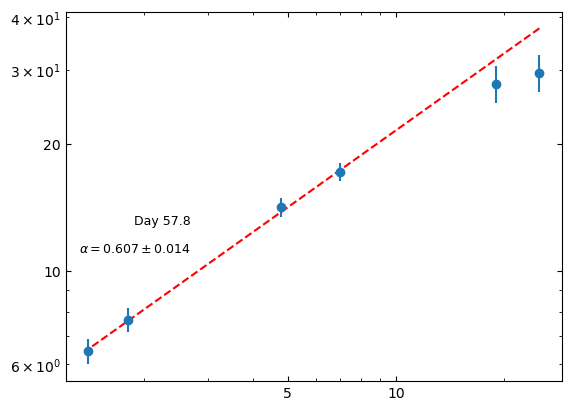

In [132]:
#plotting to check
fig,ax = plt.subplots()
mask = df12['Flux'] > 3 * df12['Error (gaussfit or image)']  # apply detection threshold
mask2 = df12['Flux'] < 3 * df12['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df12['Freq'][mask], df12['Flux'][mask], yerr=yerr12, fmt='o')
    ax.scatter(df12['Freq'][mask2], (df12['Flux'][mask2] + 3*df12['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 57.8', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df12['Freq'][mask], fit_model_weights12(df12['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.607 \\pm 0.014}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 61.8-65 (df13)

In [133]:
mask = df13['Flux'] > 3 * df13['Error (gaussfit or image)']  # apply detection threshold

x13 = df13['Freq'][mask].values.tolist()
y13 = df13['Flux'][mask].values.tolist()
yerr13 = df13['Error (gaussfit or image)'][mask].values.tolist()

In [134]:
yerr13 = error(yerr13, x13, y13)

In [135]:


PL13 =  PowerLaw1D(amplitude = y13[0], x_0= x13[0], alpha= -2.3) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit13 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model13 = fit13(PL13, x13, y13)


#weight is 1/error^2
y_weight13 = 1/ (np.power(yerr13, 2))  

# fit the data using the uncertainties as weights
fit_model_weights13 = fit13(PL13, x13, y13, weights=y_weight13)

fit_model_weights13


<PowerLaw1D(amplitude=57.64109675, x_0=33.8206411, alpha=-0.73798021)>

In [136]:
fit13.fit_info

{'nfev': 23,
 'fvec': array([ 0.78181948,  0.56090748,  1.71978501,  1.17855369,  0.57860662,
        -2.41377788, -0.18934673,  0.94105272]),
 'fjac': array([[ 1.67153230e+02, -1.28982588e+00,  1.02550072e+00,
         -1.62685120e-02, -1.85899984e-01, -2.79149513e-01,
         -6.32762259e-01, -6.97676266e-01],
        [-1.28982588e+00,  3.34972338e-01, -2.66326160e-01,
          2.47706138e-01,  7.12136992e-01,  5.35966057e-01,
          3.49410410e-02, -1.65850990e-01],
        [ 1.02550072e+00, -2.66326160e-01, -1.25140792e-16,
          2.21794789e-01,  2.21794789e-01,  4.43589578e-01,
          2.77243487e-02,  8.31730460e-01]]),
 'ipvt': array([3, 2, 1], dtype=int32),
 'qtf': array([ 4.93689853e-05, -1.21885281e-05, -7.19242195e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 6.38560720e+31,  5.07699907e+31, -1.08828412e+14],
        [ 5.07699907e+31,  4.03656

In [137]:
#taking fvec
fvec13 = np.array([ 0.78181948,  0.56090748,  1.71978501,  1.17855369,  0.57860662,
        -2.41377788, -0.18934673,  0.94105272])
var13 = np.var(fvec13)

#taking cov_x
cov_x13 = np.array([[ 6.38560720e+31,  5.07699907e+31, -1.08828412e+14],
        [ 5.07699907e+31,  4.03656515e+31, -8.65261091e+13],
        [-1.08828412e+14, -8.65261091e+13,  7.51922467e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag13 = stand(cov_x13*var13) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag13[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.03231275835660854


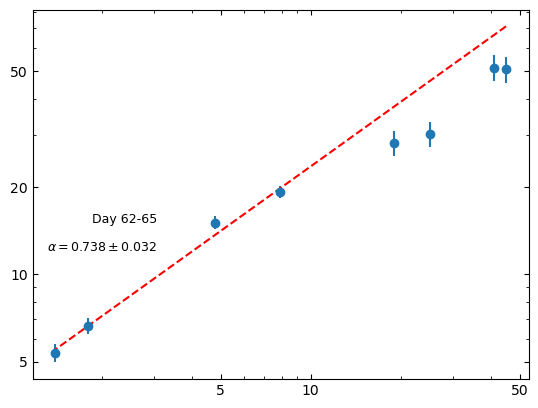

In [138]:
#plotting to check
fig,ax = plt.subplots()
mask = df13['Flux'] > 3 * df13['Error (gaussfit or image)']  # apply detection threshold
mask2 = df13['Flux'] < 3 * df13['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df13['Freq'][mask], df13['Flux'][mask], yerr=yerr13, fmt='o')
    ax.scatter(df13['Freq'][mask2], (df13['Flux'][mask2] + 3*df13['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 62-65', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df13['Freq'][mask], fit_model_weights13(df13['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.738 \\pm 0.032}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 66.7 (df14)

In [139]:
mask = df14['Flux'] > 3 * df14['Error (gaussfit or image)']  # apply detection threshold

x14 = df14['Freq'][mask].values.tolist()
y14 = df14['Flux'][mask].values.tolist()
yerr14 = df14['Error (gaussfit or image)'][mask].values.tolist()

In [140]:
yerr14 = error(yerr14, x14, y14)

In [141]:
"""

PL14 =  PowerLaw1D(amplitude = y14[0], x_0= x14[0], alpha= -3.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit14 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model14 = fit14(PL14, x14, y14)


#weight is 1/error^2
y_weight14 = 1/ (np.power(yerr14, 2))  

# fit the data using the uncertainties as weights
fit_model_weights14 = fit14(PL14, x14, y14, weights=y_weight14)

fit_model_weights14
""";

In [142]:
#fit14.fit_info

In [143]:
"""
#taking fvec
fvec14 = np.array([ 0.94389147,  0.8689982 ,  1.79496352,  0.9862844 ,  0.27072187,
        -1.9129431 , -1.47803231,  1.8640949 ])
var14 = np.var(fvec14)

#taking cov_x
cov_x14 = np.array([[4.61986652e+31, 4.34761504e+31, 2.03908142e+14],
        [4.34761504e+31, 4.09140749e+31, 1.91891714e+14],
        [2.03908142e+14, 1.91891714e+14, 1.48203258e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag14 = stand(cov_x14*var14) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag14[2]) #Just showing the standard deviation on the slope
""";

In [144]:
#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(1.1,40,0.5)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(-1,0,0.2)
a2 = np.arange(0,1,0.2)



#Will output many BPL functions 
#Check through them, if they are very far off they won't work in fitBPL
BM3 = bpl_func(x_val, y14, yerr14, a1, a2)

#BM3[43] worked for me and gives me a reasonable output in fitBPL
BM3[50]

<BrokenPowerLaw1D(amplitude=46.31, x_break=6.1, alpha_1=-1., alpha_2=0.)>

In [145]:
#Apply error as weighting in the function 

weight14 = 1/ (np.power(yerr14,2))
fw_BPL14 = fitBPL(BM3[50], x14, y14, weights=weight14)   
fw_BPL14

<BrokenPowerLaw1D(amplitude=16.52616461, x_break=5.11428215, alpha_1=-0.78542176, alpha_2=-0.4219527)>

In [146]:
fitBPL.fit_info

{'nfev': 7,
 'fvec': array([-2.26330056e-01, -2.49428283e-01,  3.54673281e-01,  3.15011841e-05,
        -2.15823722e-02,  3.91838218e-01, -1.40579500e+00,  1.05039766e+00]),
 'fjac': array([[-5.97114965e+01,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  2.68040799e-02,
          6.03127622e-01,  7.97194213e-01],
        [ 0.00000000e+00,  1.27904478e+01,  4.68007785e-01,
          3.56534704e-01,  6.71394718e-01, -8.63597852e-03,
         -1.94321059e-01, -2.56847172e-01],
        [ 7.79657882e+00,  1.44254527e+00, -3.86381060e+00,
          3.82307684e-02, -2.09994344e-01, -9.50636357e-01,
         -1.90626322e-01,  9.94995802e-02],
        [-3.07194591e+00, -1.05797953e+00,  1.59292565e+00,
          2.95847848e-01, -8.25426727e-01,  4.69854479e-01,
         -6.77589803e-02, -2.65958493e-01]]),
 'ipvt': array([3, 4, 2, 1], dtype=int32),
 'qtf': array([ 5.08159459e-07, -3.12802157e-06,  3.56753698e-07, -5.01877967e-06]),
 'message': 'Both actual and pre

In [147]:
#taking fvec
fvec14 = np.array([-2.26330056e-01, -2.49428283e-01,  3.54673281e-01,  3.15011841e-05,
        -2.15823722e-02,  3.91838218e-01, -1.40579500e+00,  1.05039766e+00])
var14 = np.var(fvec14)

#taking cov_x
cov_x14 = np.array([[ 1.14251831e+01,  4.71023795e+00,  2.72342343e-02,
          4.13814937e-01],
        [ 4.71023795e+00,  2.00886419e+00,  1.99739051e-02,
          1.63048066e-01],
        [ 2.72342343e-02,  1.99739051e-02,  1.48737227e-03,
         -9.54097912e-18],
        [ 4.13814937e-01,  1.63048066e-01, -9.54097912e-18,
          2.19528560e-02]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2]) #err 1
    sd4 = np.sqrt(diag[3]) #err 2
    return(sd1,sd2,sd3, sd4)

diag14 = stand(cov_x14*var14) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation of the first one is', diag14[2], diag14[3]) #Just showing the standard deviation on the slope



The error/standard deviation of the first one is 0.02540495865183501 0.09760097733418462


In [148]:
Xhi = cs(df14['Flux'], fw_BPL14( df14["Freq"] ))
print("The chi squared is", Xhi/(8-4))

The chi squared is 0.3891152947022609


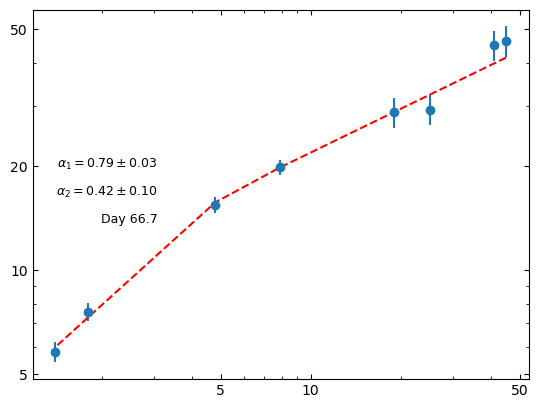

In [149]:
x_freq = np.arange(1,36,0.5)

#plotting to check
fig,ax = plt.subplots()
mask = df14['Flux'] > 3 * df14['Error (gaussfit or image)']  # apply detection threshold
mask2 = df14['Flux'] < 3 * df14['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df14['Freq'][mask], df14['Flux'][mask], yerr=yerr14, fmt='o')
    ax.scatter(df14['Freq'][mask2], (df14['Flux'][mask2] + 3*df14['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 66.7', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df14['Freq'][mask], fw_BPL14(df14['Freq'][mask]), 'r--')

    ax.annotate('${\u03B1_1 = 0.79 \\pm 0.03}$', xy=(90, 160), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1_2 = 0.42 \\pm 0.10}$', xy=(90, 140), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

    #ax.annotate('${\u03B1 = 0.690 \\pm 0.051}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


----

### Day 75.7 (df15)

In [150]:
mask = df15['Flux'] > 3 * df15['Error (gaussfit or image)']  # apply detection threshold

x15 = df15['Freq'][mask].values.tolist()
y15 = df15['Flux'][mask].values.tolist()
yerr15 = df15['Error (gaussfit or image)'][mask].values.tolist()

In [151]:
yerr15 = error(yerr15, x15, y15)

In [152]:
"""
#(work for anything with 3+ points)
PL15 =  PowerLaw1D(amplitude = y15[0], x_0= x15[0], alpha= 1.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit15 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model15 = fit15(PL15, x15, y15)


#weight is 1/error^2
y_weight15 = 1/ (np.power(yerr15, 2))  

# fit the data using the uncertainties as weights
fit_model_weights15 = fit15(PL15, x15, y15, weights=y_weight15)

fit_model_weights15
""";

In [153]:
#fit15.fit_info

In [154]:
"""#taking fvec
fvec15 = np.array([ 2.13182647,  1.61538608,  2.19624271,  1.3050419 , -0.48456809,
        -3.18793257, -2.08125534,  2.88249296])
var15 = np.var(fvec15)

#taking cov_x
cov_x15 = np.array([[ 9.51585387e+31,  7.91402241e+31, -1.12684806e+13],
        [ 7.91402241e+31,  6.58183191e+31, -9.37162440e+12],
        [-1.12684806e+13, -9.37162440e+12,  5.90729638e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag15 = stand(cov_x15*var15) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag15[2]) #Just showing the standard deviation on the slope
""";

In [155]:
#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(1.1,40,0.5)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(-1,0,0.2)
a2 = np.arange(0,1,0.2)



#Will output many BPL functions 
#Check through them, if they are very far off they won't work in fitBPL
BM3 = bpl_func(x_val, y15, yerr15, a1, a2)

#BM3[43] worked for me and gives me a reasonable output in fitBPL
BM3[50]

<BrokenPowerLaw1D(amplitude=39.97, x_break=6.1, alpha_1=-1., alpha_2=0.)>

In [156]:
#Apply error as weighting in the function 

weight15 = 1/ (np.power(yerr15,2))
fw_BPL15 = fitBPL(BM3[50], x15, y15, weights=weight15)   
fw_BPL15

<BrokenPowerLaw1D(amplitude=19.01528328, x_break=5.17046886, alpha_1=-0.86877898, alpha_2=-0.31029658)>

In [157]:
fitBPL.fit_info

{'nfev': 6,
 'fvec': array([-0.07838846, -0.23435243,  0.26624531,  0.01449851, -0.01823203,
         0.5632987 , -1.94330027,  1.47237934]),
 'fjac': array([[-5.73659691e+01,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  3.02037476e-02,
          6.09177006e-01,  7.92458900e-01],
        [ 0.00000000e+00,  1.28628666e+01,  4.57895406e-01,
          3.57942218e-01,  6.03304724e-01, -1.24750863e-02,
         -2.51609033e-01, -3.27310150e-01],
        [ 8.14133888e+00,  9.49978933e-01, -3.82610110e+00,
          1.91707924e-02, -1.61312312e-01, -9.60575236e-01,
         -1.87208646e-01,  1.20409303e-01],
        [-2.54810705e+00, -8.32454403e-01,  1.26220622e+00,
          3.67771913e-01, -8.84341759e-01,  3.54794699e-01,
         -9.92714335e-02, -2.66758428e-01]]),
 'ipvt': array([3, 4, 2, 1], dtype=int32),
 'qtf': array([-6.91555435e-05, -2.22716119e-05, -8.62280598e-05, -4.75078479e-06]),
 'message': 'Both actual and predicted relative reductions in th

In [158]:
#taking fvec
fvec15 = np.array([-0.07838846, -0.23435243,  0.26624531,  0.01449851, -0.01823203,
         0.5632987 , -1.94330027,  1.47237934])
var15 = np.var(fvec15)

#taking cov_x
cov_x15 = np.array([[ 7.39337753e+00,  2.43902785e+00,  1.77428337e-02,
          2.98349094e-01],
        [ 2.43902785e+00,  8.72930096e-01,  1.55478185e-02,
          9.33784285e-02],
        [ 1.77428337e-02,  1.55478185e-02,  1.72229911e-03,
         -4.66206934e-18],
        [ 2.98349094e-01,  9.33784285e-02, -4.66206934e-18,
          1.84560450e-02]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2]) #err 1
    sd4 = np.sqrt(diag[3]) #err 2
    return(sd1,sd2,sd3, sd4)

diag15 = stand(cov_x15*var15) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation of the first one is', diag15[2], diag15[3]) #Just showing the standard deviation on the slope


The error/standard deviation of the first one is 0.03710154989081352 0.1214526748225166


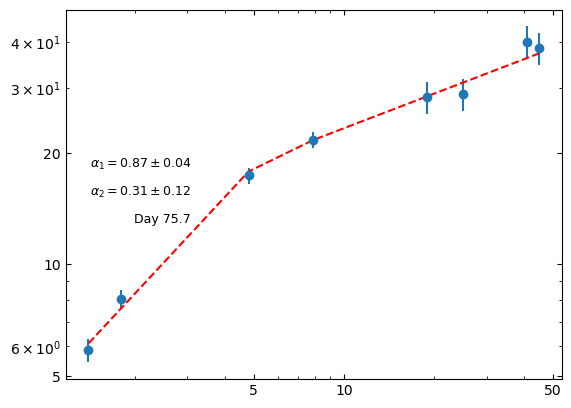

In [159]:
#plotting to check
fig,ax = plt.subplots()
mask = df15['Flux'] > 3 * df15['Error (gaussfit or image)']  # apply detection threshold
mask2 = df15['Flux'] < 3 * df15['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df15['Freq'][mask], df15['Flux'][mask], yerr=yerr15, fmt='o')
    ax.scatter(df15['Freq'][mask2], (df15['Flux'][mask2] + 3*df15['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 75.7', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df15['Freq'][mask], fw_BPL15(df15['Freq'][mask]), 'r--')
    #ax.annotate('${\u03B1 = 0.694 \\pm 0.050}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1_1 = 0.87 \\pm 0.04}$', xy=(90, 160), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1_2 = 0.31 \\pm 0.12}$', xy=(90, 140), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 79.7 (df16)

In [160]:
mask = df16['Flux'] > 3 * df16['Error (gaussfit or image)']  # apply detection threshold

x16 = df16['Freq'][mask].values.tolist()
y16 = df16['Flux'][mask].values.tolist()
yerr16 = df16['Error (gaussfit or image)'][mask].values.tolist()

In [161]:
yerr16 = error(yerr16, x16, y16)

In [162]:
"""#(work for anything with 3+ points)


PL16 =  PowerLaw1D(amplitude = y16[0], x_0= x16[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit16 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model16 = fit16(PL16, x16, y16)


#weight is 1/error^2
y_weight16 = 1/ (np.power(yerr16, 2))  

# fit the data using the uncertainties as weights
fit_model_weights16 = fit16(PL16, x16, y16, weights=y_weight16)

fit_model_weights16
""";

In [163]:
#fit16.fit_info

In [164]:
"""#taking fvec
fvec16 = np.array([ 2.20760043,  1.71229616,  2.13666787,  1.33692841, -0.5717584 ,
        -4.05613481, -0.91064373,  2.09600129])
var16 = np.var(fvec16)

#taking cov_x
cov_x16 = np.array([[ 3.95603570e+31,  3.53542656e+31, -1.15944600e+13],
        [ 3.53542656e+31,  3.15953695e+31, -1.03617270e+13],
        [-1.15944600e+13, -1.03617270e+13,  5.70354430e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag16 = stand(cov_x16*var16) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag16[2]) #Just showing the standard deviation on the slope
""";

In [165]:
#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(1.1,40,0.5)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(-1,0,0.2)
a2 = np.arange(0,1,0.2)



#Will output many BPL functions 
#Check through them, if they are very far off they won't work in fitBPL
BM3 = bpl_func(x_val, y16, yerr16, a1, a2)

#BM3[43] worked for me and gives me a reasonable output in fitBPL
BM3[50]

<BrokenPowerLaw1D(amplitude=37.05, x_break=6.1, alpha_1=-1., alpha_2=0.)>

In [166]:
#Apply error as weighting in the function 

weight16 = 1/ (np.power(yerr16,2))
fw_BPL16 = fitBPL(BM3[50], x16, y16, weights=weight16)   
fw_BPL16

<BrokenPowerLaw1D(amplitude=17.72767294, x_break=4.83199965, alpha_1=-0.88640005, alpha_2=-0.30534565)>

In [167]:
fitBPL.fit_info

{'nfev': 6,
 'fvec': array([-0.06351243, -0.2129583 ,  0.23446822,  0.02966174, -0.01762096,
         0.20077456, -0.65477337,  0.4998269 ]),
 'fjac': array([[-5.45463734e+01,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  2.71701929e-03,
          6.07298163e-01,  7.94469357e-01],
        [ 0.00000000e+00,  1.46856088e+01,  4.32743479e-01,
          3.51463323e-01,  6.34672103e-01, -1.09309098e-03,
         -2.44323678e-01, -3.19625001e-01],
        [ 8.84668219e+00,  1.07123265e+00, -4.24259054e+00,
          1.88225572e-02, -1.47014107e-01, -9.59299470e-01,
         -2.12320333e-01,  1.07199576e-01],
        [-2.72035606e+00, -9.56231358e-01,  1.36746511e+00,
          3.90024739e-01, -8.81454178e-01,  3.53520279e-01,
         -1.00865362e-01, -2.74138572e-01]]),
 'ipvt': array([3, 4, 2, 1], dtype=int32),
 'qtf': array([-3.27295854e-06, -1.40852218e-05, -3.94642150e-06, -1.75579650e-05]),
 'message': 'Both actual and predicted relative reductions in th

In [168]:
#taking fvec
fvec16 = np.array([-0.06351243, -0.2129583 ,  0.23446822,  0.02966174, -0.01762096,
         0.20077456, -0.65477337,  0.4998269 ])
var16 = np.var(fvec16)

#taking cov_x
cov_x16 = np.array([[ 6.57378792e+00,  2.11885298e+00,  1.57989442e-02,
          2.73483906e-01],
        [ 2.11885298e+00,  7.38502229e-01,  1.41028617e-02,
          8.40963410e-02],
        [ 1.57989442e-02,  1.41028617e-02,  1.83546219e-03,
         -7.37257477e-18],
        [ 2.73483906e-01,  8.40963410e-02, -7.37257477e-18,
          1.63099139e-02]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2]) #err 1
    sd4 = np.sqrt(diag[3]) #err 2
    return(sd1,sd2,sd3, sd4)

diag16 = stand(cov_x16*var16) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation of the first one is', diag16[2], diag16[3]) #Just showing the standard deviation on the slope


The error/standard deviation of the first one is 0.013752850145873172 0.040996409617613104


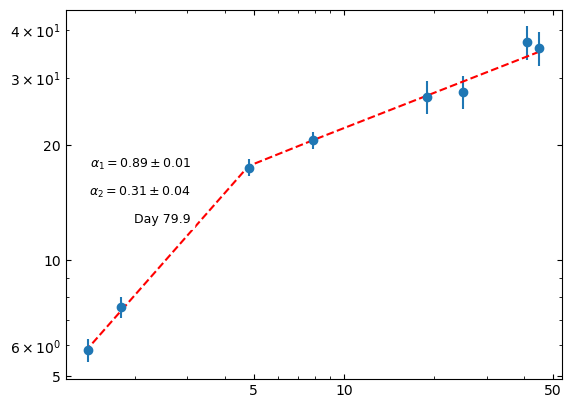

In [169]:
#plotting to check
fig,ax = plt.subplots()
mask = df16['Flux'] > 3 * df16['Error (gaussfit or image)']  # apply detection threshold
mask2 = df16['Flux'] < 3 * df16['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df16['Freq'][mask], df16['Flux'][mask], yerr=yerr16, fmt='o')
    ax.scatter(df16['Freq'][mask2], (df16['Flux'][mask2] + 3*df16['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 79.9', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df16['Freq'][mask], fw_BPL16(df16['Freq'][mask]), 'r--')
    
    #ax.annotate('${\u03B1 = 0.678 \\pm 0.049}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

    ax.annotate('${\u03B1_1 = 0.89 \\pm 0.01}$', xy=(90, 160), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1_2 = 0.31 \\pm 0.04}$', xy=(90, 140), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    
plt.show();


### Day 96.7 (df17)

In [170]:
mask = df17['Flux'] > 3 * df17['Error (gaussfit or image)']  # apply detection threshold

x17 = df17['Freq'][mask].values.tolist()
y17 = df17['Flux'][mask].values.tolist()
yerr17 = df17['Error (gaussfit or image)'][mask].values.tolist()


In [171]:
yerr17= error(yerr17, x17, y17)

In [172]:
#(work for anything with 3+ points)

PL17 =  PowerLaw1D(amplitude = y17[0], x_0= x17[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit17 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model17 = fit17(PL17, x17, y17)


#weight is 1/error^2
y_weight17 = 1/ (np.power(yerr17, 2))  

# fit the data using the uncertainties as weights
fit_model_weights17 = fit17(PL17, x17, y17, weights=y_weight17)

fit_model_weights17


<PowerLaw1D(amplitude=66.99867509, x_0=32.39296271, alpha=-0.77441198)>

In [173]:
fit17.fit_info

{'nfev': 18,
 'fvec': array([ 2.22224996, -2.64989443, -1.9744691 ,  1.88762591]),
 'fjac': array([[-1.70620024e+02,  1.43972168e+00, -8.98451523e-01,
          7.40453042e-01],
        [ 1.43972168e+00,  3.26394928e-01, -2.03685215e-01,
         -8.21423476e-01],
        [-8.98451523e-01, -2.03685215e-01,  1.71658755e-16,
         -9.70142500e-01]]),
 'ipvt': array([3, 2, 1], dtype=int32),
 'qtf': array([-3.6324915e-04, -8.2344903e-05, -3.4487828e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 3.39365808e+31,  2.11779632e+31, -5.68532297e+13],
        [ 2.11779632e+31,  1.32160080e+31, -3.54789898e+13],
        [-5.68532297e+13, -3.54789898e+13,  7.97955805e-04]]),
 'njev': 10,
 'cov_x': array([[ 3.39365808e+31,  2.11779632e+31, -5.68532297e+13],
        [ 2.11779632e+31,  1.32160080e+31, -3.54789898e+13],
        [-5.68532297e+13, -3.54789898e+13,  7.97955805e-04]]

In [174]:
#taking fvec
fvec17 = np.array([ 2.22224996, -2.64989443, -1.9744691 ,  1.88762591])
var17 = np.var(fvec17)

#taking cov_x
cov_x17 = np.array([[ 3.39365808e+31,  2.11779632e+31, -5.68532297e+13],
        [ 2.11779632e+31,  1.32160080e+31, -3.54789898e+13],
        [-5.68532297e+13, -3.54789898e+13,  7.97955805e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag17 = stand(cov_x17*var17) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag17[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.062139137344593004


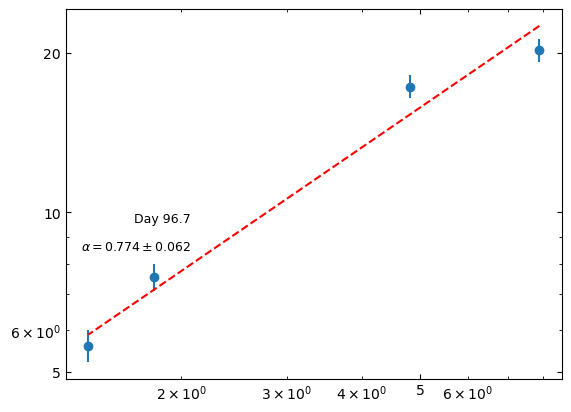

In [175]:
#plotting to check
fig,ax = plt.subplots()
mask = df17['Flux'] > 3 * df17['Error (gaussfit or image)']  # apply detection threshold
mask2 = df17['Flux'] < 3 * df17['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df17['Freq'][mask], df17['Flux'][mask], yerr=yerr17, fmt='o')
    ax.scatter(df17['Freq'][mask2], (df17['Flux'][mask2] + 3*df17['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 96.7', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df17['Freq'][mask], fit_model_weights17(df17['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.774 \\pm 0.062}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 101.8 (df18)

In [176]:
mask = df18['Flux'] > 3 * df18['Error (gaussfit or image)']  # apply detection threshold

x18 = df18['Freq'][mask].values.tolist()
y18 = df18['Flux'][mask].values.tolist()
yerr18 = df18['Error (gaussfit or image)'][mask].values.tolist()

In [177]:
yerr18 = error(yerr18, x18, y18)

In [178]:
#(work for anything with 3+ points)


PL18 =  PowerLaw1D(amplitude = y18[0], x_0= x18[0], alpha= -3.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit18 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model18 = fit18(PL18, x18, y18)


#weight is 1/error^2
y_weight18 = 1/ (np.power(yerr18, 2))  

# fit the data using the uncertainties as weights
fit_model_weights18 = fit18(PL18, x18, y18, weights=y_weight18)

fit_model_weights18


<PowerLaw1D(amplitude=20.23106611, x_0=7.40704399, alpha=-0.71302832)>

In [179]:
fit18.fit_info

{'nfev': 19,
 'fvec': array([ 2.37588349, -3.61066221, -1.82877625,  2.10913123]),
 'fjac': array([[ 6.98366227e+01, -4.41948991e+00,  2.26929795e+00,
         -7.66598650e-01],
        [-4.41948991e+00,  2.68000914e+00, -1.37611792e+00,
          5.44721673e-01],
        [ 2.26929795e+00, -1.37611792e+00,  5.55111512e-16,
          8.00000000e-01]]),
 'ipvt': array([3, 2, 1], dtype=int32),
 'qtf': array([ 1.07565912e-04, -6.51615802e-05, -4.61964545e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 3.24518554e+30,  1.66632191e+30, -2.49937356e+13],
        [ 1.66632191e+30,  8.55614784e+29, -1.28336605e+13],
        [-2.49937356e+13, -1.28336605e+13,  9.55111661e-04]]),
 'njev': 11,
 'cov_x': array([[ 3.24518554e+30,  1.66632191e+30, -2.49937356e+13],
        [ 1.66632191e+30,  8.55614784e+29, -1.28336605e+13],
        [-2.49937356e+13, -1.28336605e+13,  9.55111661e-0

In [180]:
#taking fvec
fvec18 = np.array([ 2.37588349, -3.61066221, -1.82877625,  2.10913123])
var18 = np.var(fvec18)

#taking cov_x
cov_x18 = np.array([[ 3.24518554e+30,  1.66632191e+30, -2.49937356e+13],
        [ 1.66632191e+30,  8.55614784e+29, -1.28336605e+13],
        [-2.49937356e+13, -1.28336605e+13,  9.55111661e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag18 = stand(cov_x18*var18) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag18[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.07916541748693731


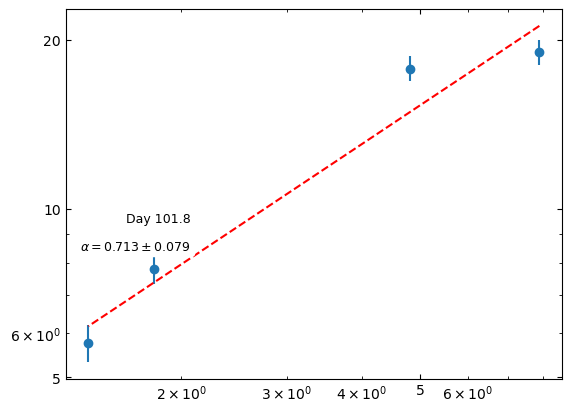

In [181]:
#plotting to check
fig,ax = plt.subplots()
mask = df18['Flux'] > 3 * df18['Error (gaussfit or image)']  # apply detection threshold
mask2 = df18['Flux'] < 3 * df18['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df18['Freq'][mask], df18['Flux'][mask], yerr=yerr18, fmt='o')
    ax.scatter(df18['Freq'][mask2], (df18['Flux'][mask2] + 3*df18['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 101.8', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df18['Freq'][mask], fit_model_weights18(df18['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.713 \\pm 0.079}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 102.7 (df19)

In [182]:
mask = df19['Flux'] > 3 * df19['Error (gaussfit or image)']  # apply detection threshold

x19 = df19['Freq'][mask].values.tolist()
y19 = df19['Flux'][mask].values.tolist()
yerr19 = df19['Error (gaussfit or image)'][mask].values.tolist()

In [183]:
yerr19 = error(yerr19, x19, y19)

In [184]:
"""#(work for anything with 3+ points)

PL19 =  PowerLaw1D(amplitude = y19[0], x_0= x19[0], alpha= -3.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit19 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model19 = fit19(PL19, x19, y19)


#weight is 1/error^2
y_weight19 = 1/ (np.power(yerr19, 2))  

# fit the data using the uncertainties as weights
fit_model_weights19 = fit19(PL19, x19, y19, weights=y_weight19)

fit_model_weights19
""";

In [185]:
#fit19.fit_info

In [186]:
"""#taking fvec
fvec19 = np.array([ 2.3102501 ,  2.70245791,  2.26341674,  1.09914822, -1.15283138,
        -5.79668298, -0.44362248,  2.27808379])
var19 = np.var(fvec19)

#taking cov_x
cov_x19 = np.array([[2.10928917e+31, 3.07912594e+31, 1.06757982e+14],
        [3.07912594e+31, 4.49488704e+31, 1.55844573e+14],
        [1.06757982e+14, 1.55844573e+14, 1.00380272e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag19 = stand(cov_x19*var19) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag19[2]) #Just showing the standard deviation on the slope
""";

In [187]:
#Input values for function above 
#Going through a range of x values (the point where the line breaks)
#And different alpha 1 and alpha 2 values (the alpha values on either side of that break)

x_val = np.arange(1.1,40,0.5)   #Going through a range of freq values from 0.1 to 40
                                #because thats what my data ranges from, may be different for you
    
a1 = np.arange(-1,0,0.2)
a2 = np.arange(0,1,0.2)



#Will output many BPL functions 
#Check through them, if they are very far off they won't work in fitBPL
BM3 = bpl_func(x_val, y19, yerr19, a1, a2)

#BM3[43] worked for me and gives me a reasonable output in fitBPL
BM3[50]

<BrokenPowerLaw1D(amplitude=28.133, x_break=6.1, alpha_1=-1., alpha_2=0.)>

In [188]:
#Apply error as weighting in the function 

weight19 = 1/ (np.power(yerr19,2))
fw_BPL19 = fitBPL(BM3[50], x19, y19, weights=weight19)   
fw_BPL19

<BrokenPowerLaw1D(amplitude=17.09188139, x_break=4.63498218, alpha_1=-0.88777108, alpha_2=-0.16810543)>

In [189]:
fitBPL.fit_info

{'nfev': 7,
 'fvec': array([-3.62793614e-01, -1.80036216e-01,  4.38439303e-02, -2.57528671e-01,
         4.52352187e-01, -3.25113415e-01,  5.53918739e-12,  5.27391801e-12]),
 'fjac': array([[-5.36382671e+01,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          6.38646067e-01,  7.69500618e-01],
        [ 0.00000000e+00,  1.79830258e+01,  4.20889219e-01,
          3.19641461e-01,  6.36845803e-01,  4.29294426e-02,
         -2.37607386e-01, -2.86291641e-01],
        [-2.90549153e+00, -1.19092849e+00,  1.46319163e+00,
          5.16247435e-02, -4.31348134e-01, -8.53537816e-01,
         -2.64329317e-01,  4.78135685e-02],
        [ 9.51179528e+00,  7.38275211e-01, -1.11956156e+00,
          8.83182261e-01, -9.41040943e-02, -1.86210156e-01,
          7.33795598e-01, -6.46442087e-01]]),
 'ipvt': array([3, 4, 1, 2], dtype=int32),
 'qtf': array([-1.32970447e-08, -3.68336535e-05, -2.97778594e-05, -7.16658671e-06]),
 'message': 'Both actual and pre

In [190]:
#taking fvec
fvec19 = np.array([-3.62793614e-01, -1.80036216e-01,  4.38439303e-02, -2.57528671e-01,
         4.52352187e-01, -3.25113415e-01,  5.53918739e-12,  5.27391801e-12])
var19 = np.var(fvec16)

#taking cov_x
cov_x19 = np.array([[1.21765966e+00, 9.80948244e-01, 1.07995268e-01, 4.03678345e-02],
        [9.80948244e-01, 1.28203336e+00, 1.74209618e-01, 1.23308375e-02],
        [1.07995268e-01, 1.74209618e-01, 2.53906467e-02, 6.07153217e-18],
        [4.03678345e-02, 1.23308375e-02, 6.07153217e-18, 5.25938449e-03]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2]) #err 1
    sd4 = np.sqrt(diag[3]) #err 2
    return(sd1,sd2,sd3, sd4)

diag19 = stand(cov_x19*var19) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation of the first one is', diag19[2], diag19[3]) #Just showing the standard deviation on the slope


The error/standard deviation of the first one is 0.05115132297966061 0.02328023983822283


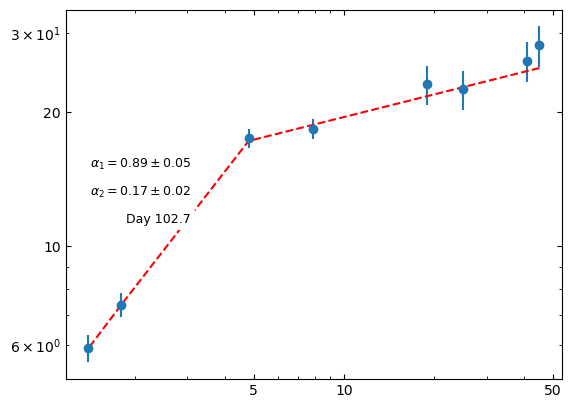

In [191]:
#plotting to check
fig,ax = plt.subplots()
mask = df19['Flux'] > 3 * df19['Error (gaussfit or image)']  # apply detection threshold
mask2 = df19['Flux'] < 3 * df19['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df19['Freq'][mask], df19['Flux'][mask], yerr=yerr19, fmt='o')
    ax.scatter(df19['Freq'][mask2], (df19['Flux'][mask2] + 3*df19['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 102.7', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df19['Freq'][mask], fw_BPL19(df19['Freq'][mask]), 'r--')
    #ax.annotate('${\u03B1 = 0.584 \\pm 0.085}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1_1 = 0.89 \\pm 0.05}$', xy=(90, 160), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.annotate('${\u03B1_2 = 0.17 \\pm 0.02}$', xy=(90, 140), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    

plt.show();


### Day 138.5 (df20)

In [192]:
mask = df20['Flux'] > 3 * df20['Error (gaussfit or image)']  # apply detection threshold

x20 = df20['Freq'][mask].values.tolist()
y20 = df20['Flux'][mask].values.tolist()
yerr20 = df20['Error (gaussfit or image)'][mask].values.tolist()

In [193]:
yerr20 = error(yerr20, x20, y20)

In [194]:
#(work for anything with 3+ points)


PL20 =  PowerLaw1D(amplitude = y20[0], x_0= x20[0], alpha= -1) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit20 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model20 = fit20(PL20, x20, y20)


#weight is 1/error^2
y_weight20 = 1/ (np.power(yerr20, 2))  

# fit the data using the uncertainties as weights
fit_model_weights20 = fit20(PL20, x20, y20, weights=y_weight20)

fit_model_weights20


<PowerLaw1D(amplitude=24.22253381, x_0=40.98157423, alpha=-0.35121032)>

In [195]:
fit20.fit_info

{'nfev': 19,
 'fvec': array([ 1.45745112,  1.33046589,  3.59627357,  1.62605339, -1.82778342,
        -3.58068182, -0.5520485 ,  2.43509184]),
 'fjac': array([[ 1.74766166e+02,  2.47171124e+00, -5.13092819e-01,
         -3.64875325e-02, -2.38171957e-01, -3.29623582e-01,
         -5.57755091e-01, -7.21971748e-01],
        [ 2.47171124e+00, -8.24299681e-01,  1.71113130e-01,
          3.16748383e-01,  6.21858280e-01,  4.53452058e-01,
          5.28452956e-02, -8.20857136e-02],
        [-5.13092819e-01,  1.71113130e-01, -5.13724233e-17,
          0.00000000e+00, -2.70140805e-01, -2.70140805e-01,
         -8.77957617e-01,  1.01302802e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([ 1.57278050e-04, -4.04719232e-05, -2.57517250e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[1.63281245e+31, 7.86571305e+31, 1.16704759e+13],
        [7.86571305e+31, 3.78913340e+

In [196]:
#taking fvec
fvec20 = np.array([ 1.45745112,  1.33046589,  3.59627357,  1.62605339, -1.82778342,
        -3.58068182, -0.5520485 ,  2.43509184])
var20 = np.var(fvec20)

#taking cov_x
cov_x20 = np.array([[1.63281245e+31, 7.86571305e+31, 1.16704759e+13],
        [7.86571305e+31, 3.78913340e+32, 5.62199381e+13],
        [1.16704759e+13, 5.62199381e+13, 3.35463414e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag20 = stand(cov_x20*var20) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag20[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.040622919295151584


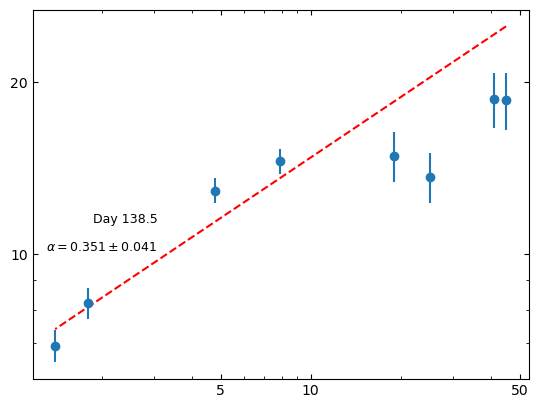

In [197]:
#plotting to check
fig,ax = plt.subplots()
mask = df20['Flux'] > 3 * df20['Error (gaussfit or image)']  # apply detection threshold
mask2 = df20['Flux'] < 3 * df20['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df20['Freq'][mask], df20['Flux'][mask], yerr=yerr20, fmt='o')
    ax.scatter(df20['Freq'][mask2], (df20['Flux'][mask2] + 3*df20['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 138.5', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df20['Freq'][mask], fit_model_weights20(df20['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.351 \\pm 0.041}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 153.6 (df21)

In [198]:
mask = df21['Flux'] > 3 * df21['Error (gaussfit or image)']  # apply detection threshold

x21 = df21['Freq'][mask].values.tolist()
y21 = df21['Flux'][mask].values.tolist()
yerr21 = df21['Error (gaussfit or image)'][mask].values.tolist()

In [199]:
yerr21 = error(yerr21, x21, y21)

In [200]:
#(work for anything with 3+ points)


PL21 =  PowerLaw1D(amplitude = y21[0], x_0= x21[0], alpha= 0) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit21 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model21 = fit21(PL21, x21, y21)


#weight is 1/error^2
y_weight21 = 1/ (np.power(yerr21, 2))  

# fit the data using the uncertainties as weights
fit_model_weights21 = fit21(PL21, x21, y21, weights=y_weight21)

fit_model_weights21


<PowerLaw1D(amplitude=19.26751822, x_0=64.15302939, alpha=-0.22705158)>

In [201]:
fit21.fit_info

{'nfev': 11,
 'fvec': array([ 2.03489194,  2.84025556,  1.27257919,  0.77040863, -2.24328156,
        -3.06425257,  1.76932299,  0.60504738]),
 'fjac': array([[-2.11620329e+02, -3.37712936e+00,  2.30293055e-01,
          4.75991069e-02,  2.80682189e-01,  3.61632445e-01,
          6.95667101e-01,  5.49600998e-01],
        [-3.37712936e+00, -1.00894659e+00,  6.88020407e-02,
          2.48271187e-01,  4.11870525e-01,  1.69438378e-01,
         -4.75771762e-01, -4.85884997e-01],
        [ 2.30293055e-01,  6.88020407e-02, -5.44437926e-17,
          1.91175896e-01,  6.37252988e-02,  3.18626494e-02,
         -8.92154183e-01, -3.82351793e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-9.78723816e-05,  9.79782696e-05,  1.58688909e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 1.56880710e+30,  2.30057503e+31, -1.24256941e+13],
        [ 2.30057503e+31,  3.37367

In [202]:
#taking fvec
fvec21 = np.array([ 2.03489194,  2.84025556,  1.27257919,  0.77040863, -2.24328156,
        -3.06425257,  1.76932299,  0.60504738])
var21 = np.var(fvec21)

#taking cov_x
cov_x21 = np.array([[ 1.56880710e+30,  2.30057503e+31, -1.24256941e+13],
        [ 2.30057503e+31,  3.37367512e+32, -1.82216422e+14],
        [-1.24256941e+13, -1.82216422e+14,  3.70922403e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag21 = stand(cov_x21*var21) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag21[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.0375151878385926


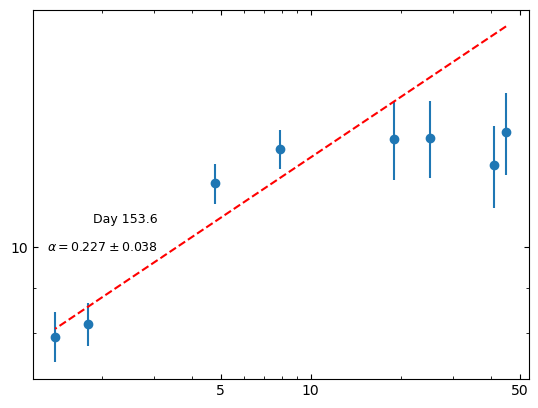

In [203]:
#plotting to check
fig,ax = plt.subplots()
mask = df21['Flux'] > 3 * df21['Error (gaussfit or image)']  # apply detection threshold
mask2 = df21['Flux'] < 3 * df21['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df21['Freq'][mask], df21['Flux'][mask], yerr=yerr21, fmt='o')
    ax.scatter(df21['Freq'][mask2], (df21['Flux'][mask2] + 3*df21['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 153.6', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df21['Freq'][mask], fit_model_weights21(df21['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.227 \\pm 0.038}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 168.5 (df22)

In [204]:
mask = df22['Flux'] > 3 * df22['Error (gaussfit or image)']  # apply detection threshold

x22 = df22['Freq'][mask].values.tolist()
y22 = df22['Flux'][mask].values.tolist()
yerr22 = df22['Error (gaussfit or image)'][mask].values.tolist()

In [205]:
yerr22 = error(yerr22, x22, y22)

In [206]:
#(work for anything with 3+ points)

PL22 =  PowerLaw1D(amplitude = y22[0], x_0= x22[0], alpha= -4.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit22 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model22 = fit22(PL22, x22, y22)


#weight is 1/error^2
y_weight22 = 1/ (np.power(yerr22, 2))  

# fit the data using the uncertainties as weights
fit_model_weights22 = fit22(PL22, x22, y22, weights=y_weight22)

fit_model_weights22


<PowerLaw1D(amplitude=24.54241593, x_0=81.4214989, alpha=-0.35153419)>

In [207]:
fit22.fit_info

{'nfev': 24,
 'fvec': array([ 1.81977826,  1.90471896,  3.98041206,  2.01086826, -1.56787099,
        -5.69473289,  0.25287924,  2.75648141]),
 'fjac': array([[-2.55812661e+02, -2.97976327e+00,  3.16008419e-01,
          5.90535175e-02,  3.06274709e-01,  3.33629598e-01,
          5.99966706e-01,  6.53580439e-01],
        [-2.97976327e+00, -8.19729707e-01,  8.69335800e-02,
          2.83948375e-01,  4.63951714e-01,  1.84857864e-01,
         -3.61833607e-01, -5.29168850e-01],
        [ 3.16008419e-01,  8.69335800e-02, -3.57201426e-17,
         -9.71285862e-02, -3.88514345e-01,  2.91385759e-01,
          3.88514345e-01, -7.77028690e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-3.46304278e-04, -8.40558207e-05,  2.91529638e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[8.81469749e+30, 8.31171268e+31, 1.49601897e+13],
        [8.31171268e+31, 7.83742922e+

In [208]:
#taking fvec
fvec22 = np.array([ 1.81977826,  1.90471896,  3.98041206,  2.01086826, -1.56787099,
        -5.69473289,  0.25287924,  2.75648141])
var22 = np.var(fvec22)

#taking cov_x
cov_x22 = np.array([[8.81469749e+30, 8.31171268e+31, 1.49601897e+13],
        [8.31171268e+31, 7.83742922e+32, 1.41065305e+14],
        [1.49601897e+13, 1.41065305e+14, 2.42590813e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag22 = stand(cov_x22*var22) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag22[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.044617008133632036


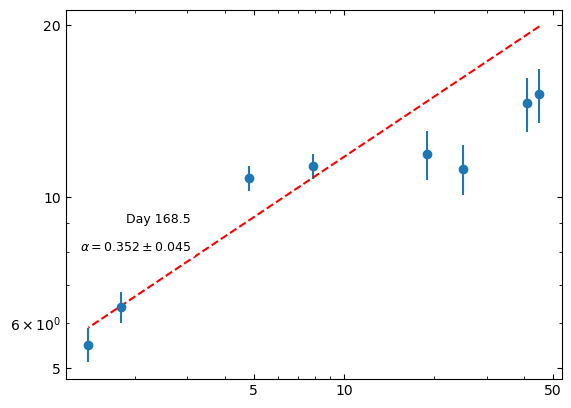

In [209]:
#plotting to check
fig,ax = plt.subplots()
mask = df22['Flux'] > 3 * df22['Error (gaussfit or image)']  # apply detection threshold
mask2 = df22['Flux'] < 3 * df22['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df22['Freq'][mask], df22['Flux'][mask], yerr=yerr22, fmt='o')
    ax.scatter(df22['Freq'][mask2], (df22['Flux'][mask2] + 3*df22['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 168.5', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df22['Freq'][mask], fit_model_weights22(df22['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.352 \\pm 0.045}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 183.5 (df23)

In [210]:
mask = df23['Flux'] > 3 * df23['Error (gaussfit or image)']  # apply detection threshold

x23 = df23['Freq'][mask].values.tolist()
y23 = df23['Flux'][mask].values.tolist()
yerr23 = df23['Error (gaussfit or image)'][mask].values.tolist()

In [211]:
yerr23 = error(yerr23, x23, y23)

In [212]:
#(work for anything with 3+ points)


PL23 =  PowerLaw1D(amplitude = y23[0], x_0= x23[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit23 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model23 = fit23(PL23, x23, y23)


#weight is 1/error^2
y_weight23 = 1/ (np.power(yerr23, 2))  

# fit the data using the uncertainties as weights
fit_model_weights23 = fit23(PL23, x23, y23, weights=y_weight23)

fit_model_weights23


<PowerLaw1D(amplitude=11.87701392, x_0=19.43106676, alpha=-0.25806268)>

In [213]:
fit23.fit_info

{'nfev': 22,
 'fvec': array([ 3.92952367,  2.87638277,  3.48172882,  1.78616106, -2.83094004,
        -6.48277892,  0.71353041,  3.05578544]),
 'fjac': array([[ 1.77139499e+02,  6.51003767e+00, -1.02687914e+00,
         -1.48363486e-03, -1.82365116e-01, -2.49273361e-01,
         -6.85025414e-01, -6.56684787e-01],
        [ 6.51003767e+00, -3.12425287e+00,  4.92812831e-01,
          3.13145349e-01,  6.52908986e-01,  4.21318245e-01,
          1.93625362e-01,  5.97210140e-02],
        [-1.02687914e+00,  4.92812831e-01, -1.85445104e-16,
          1.49670037e-01,  2.99340075e-01,  0.00000000e+00,
         -8.98020224e-01, -2.43213811e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([7.20154325e-05, 3.90081747e-05, 4.39527582e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[7.23503964e+29, 4.58675017e+30, 2.32815387e+12],
        [4.58675017e+30, 2.90783163e+31,

In [214]:
#taking fvec
fvec23 = np.array([ 3.92952367,  2.87638277,  3.48172882,  1.78616106, -2.83094004,
        -6.48277892,  0.71353041,  3.05578544])
var23 = np.var(fvec23)

#taking cov_x
cov_x23 = np.array([[7.23503964e+29, 4.58675017e+30, 2.32815387e+12],
        [4.58675017e+30, 2.90783163e+31, 1.47596429e+13],
        [2.32815387e+12, 1.47596429e+13, 1.77731389e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag23 = stand(cov_x23*var23) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag23[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.04559765913939875


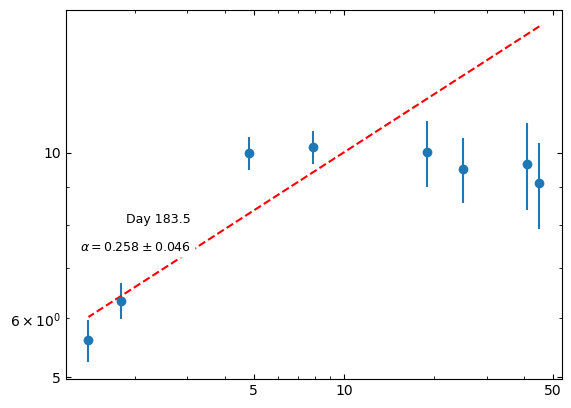

In [215]:
#plotting to check
fig,ax = plt.subplots()
mask = df23['Flux'] > 3 * df23['Error (gaussfit or image)']  # apply detection threshold
mask2 = df23['Flux'] < 3 * df23['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection]
    ax.errorbar(df23['Freq'][mask], df23['Flux'][mask], yerr=yerr23, fmt='o')
    ax.scatter(df23['Freq'][mask2], (df23['Flux'][mask2] + 3*df23['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 183.5', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df23['Freq'][mask], fit_model_weights23(df23['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.258 \\pm 0.046}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 203.4 (df24)

In [216]:

mask = df24['Flux'] > 3 * df24['Error (gaussfit or image)']  # apply detection threshold

x24 = df24['Freq'][mask].values.tolist()
y24 = df24['Flux'][mask].values.tolist()
yerr24 = df24['Error (gaussfit or image)'][mask].values.tolist()

In [217]:
yerr24 = error(yerr24, x24, y24)

In [218]:
#(work for anything with 3+ points)


PL24 =  PowerLaw1D(amplitude = y24[0], x_0= x24[0], alpha= -3) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit24 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model24 = fit24(PL24, x24, y24)


#weight is 1/error^2
y_weight24 = 1/ (np.power(yerr24, 2))  

# fit the data using the uncertainties as weights
fit_model_weights24 = fit24(PL24, x24, y24, weights=y_weight24)

fit_model_weights24


<PowerLaw1D(amplitude=8.35153463, x_0=5.85331456, alpha=-0.29929785)>

In [219]:
fit24.fit_info

{'nfev': 19,
 'fvec': array([ 1.24850337,  0.31616555,  2.7567468 ,  2.0626367 ,  0.15980445,
        -6.03667159,  3.54639432, -1.40742654]),
 'fjac': array([[ 1.12515687e+02,  8.47911682e+00, -3.62091754e+00,
          1.27200555e-01,  1.15409089e-01, -6.42934202e-02,
         -6.49187400e-01, -6.99542303e-01],
        [ 8.47911682e+00, -8.84238566e+00,  3.77604767e+00,
          2.61160937e-01,  6.74026367e-01,  4.44957455e-01,
          3.45976376e-01,  2.14025510e-01],
        [-3.62091754e+00,  3.77604767e+00,  9.93013661e-16,
         -0.00000000e+00, -8.94427191e-01,  2.23606798e-01,
          2.23606798e-01, -2.23606798e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([ 1.11513928e-04, -1.23073289e-04, -3.77965308e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[1.84937757e+29, 4.33069471e+29, 1.45208344e+11],
        [4.33069471e+29, 1.01412048e+

In [220]:
#taking fvec
fvec24 = np.array([ 1.24850337,  0.31616555,  2.7567468 ,  2.0626367 ,  0.15980445,
        -6.03667159,  3.54639432, -1.40742654])
var24 = np.var(fvec24)

#taking cov_x
cov_x24 = np.array([[1.84937757e+29, 4.33069471e+29, 1.45208344e+11],
        [4.33069471e+29, 1.01412048e+30, 3.40034950e+11],
        [1.45208344e+11, 3.40034950e+11, 1.51737696e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag24 = stand(cov_x24*var24) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag24[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.034749043174645305


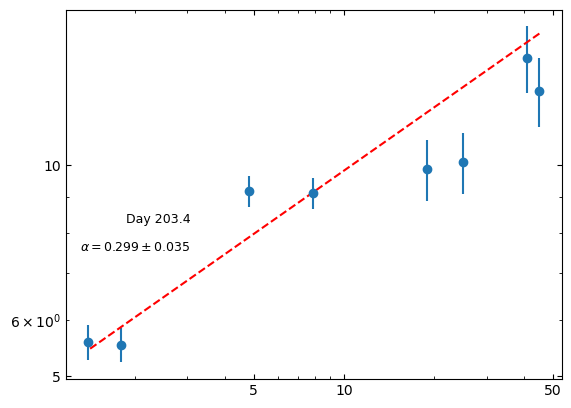

In [221]:
#plotting to check
fig,ax = plt.subplots()
mask = df24['Flux'] > 3 * df24['Error (gaussfit or image)']  # apply detection threshold
mask2 = df24['Flux'] < 3 * df24['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df24['Freq'][mask], df24['Flux'][mask], yerr=yerr24, fmt='o')
    ax.scatter(df24['Freq'][mask2], (df24['Flux'][mask2] + 3*df24['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 203.4', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df24['Freq'][mask], fit_model_weights24(df24['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.299 \\pm 0.035}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 359.6 (df25)

In [222]:
mask = df25['Flux'] > 3 * df25['Error (gaussfit or image)']  # apply detection threshold

x25 = df25['Freq'][mask].values.tolist()
y25 = df25['Flux'][mask].values.tolist()
yerr25 = df25['Error (gaussfit or image)'][mask].values.tolist()

In [223]:
yerr25 = error(yerr25, x25, y25)

In [224]:
#(work for anything with 3+ points)


PL25 =  PowerLaw1D(amplitude = y25[0], x_0= x25[0], alpha= -4.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit25 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model25 = fit25(PL25, x25, y25)


#weight is 1/error^2
y_weight25 = 1/ (np.power(yerr25, 2))  

# fit the data using the uncertainties as weights
fit_model_weights25 = fit25(PL25, x25, y25, weights=y_weight25)

fit_model_weights25


<PowerLaw1D(amplitude=5.36614894, x_0=50.91504138, alpha=-0.05009805)>

In [225]:
fit25.fit_info

{'nfev': 23,
 'fvec': array([-0.31702273,  0.01668269,  1.94767339,  2.16097716,  1.00813729,
        -3.56749153, -1.68630205,  3.45211264]),
 'fjac': array([[-4.11686183e+02, -2.70473581e+01,  1.42811197e-01,
          5.31662102e-02,  3.90546385e-01,  4.25397893e-01,
          5.90716307e-01,  5.59617841e-01],
        [-2.70473581e+01, -9.15270111e+00,  4.83266497e-02,
          3.06800010e-01,  4.28876568e-01,  1.54828669e-01,
         -4.37167985e-01, -5.38671539e-01],
        [ 1.42811197e-01,  4.83266497e-02,  3.97475082e-17,
          1.74574312e-01, -8.72871561e-02,  5.67366515e-01,
          6.98297249e-01,  3.49148624e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-3.48188183e-05, -1.45643158e-05,  1.09989398e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[1.76463546e+28, 3.34208578e+30, 1.35201637e+11],
        [3.34208578e+30, 6.32965712e+

In [226]:
#taking fvec
fvec25 = np.array([-0.31702273,  0.01668269,  1.94767339,  2.16097716,  1.00813729,
        -3.56749153, -1.68630205,  3.45211264])
var25 = np.var(fvec25)

#taking cov_x
cov_x25 = np.array([[1.76463546e+28, 3.34208578e+30, 1.35201637e+11],
        [3.34208578e+30, 6.32965712e+32, 2.56061651e+13],
        [1.35201637e+11, 2.56061651e+13, 5.84611542e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag25 = stand(cov_x25*var25) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag25[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.016204259521049


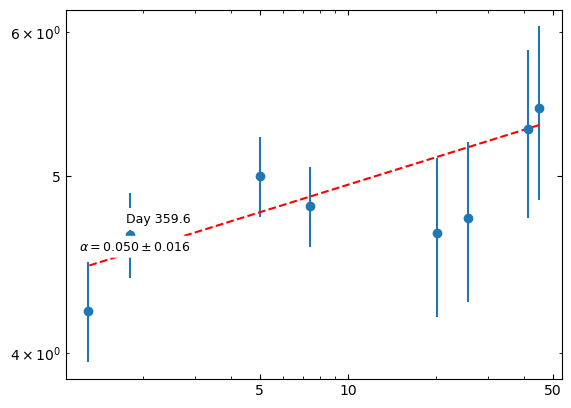

In [227]:
#plotting to check
fig,ax = plt.subplots()
mask = df25['Flux'] > 3 * df25['Error (gaussfit or image)']  # apply detection threshold
mask2 = df25['Flux'] < 3 * df25['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df25['Freq'][mask], df25['Flux'][mask], yerr=yerr25, fmt='o')
    ax.scatter(df25['Freq'][mask2], (df25['Flux'][mask2] + 3*df25['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 359.6', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df25['Freq'][mask], fit_model_weights25(df25['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.050 \\pm 0.016}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 469.6 (df26)

In [228]:
mask = df26['Flux'] > 3 * df26['Error (gaussfit or image)']  # apply detection threshold

x26 = df26['Freq'][mask].values.tolist()
y26 = df26['Flux'][mask].values.tolist()
yerr26 = df26['Error (gaussfit or image)'][mask].values.tolist()

In [229]:
yerr26 = error(yerr26, x26, y26)

In [230]:
#(work for anything with 3+ points)


PL26 =  PowerLaw1D(amplitude = y26[0], x_0= x26[0], alpha= -2.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit26 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model26 = fit26(PL26, x26, y26)


#weight is 1/error^2
y_weight26 = 1/ (np.power(yerr26, 2))  

# fit the data using the uncertainties as weights
fit_model_weights26 = fit26(PL26, x26, y26, weights=y_weight26)

fit_model_weights26


<PowerLaw1D(amplitude=1.66511219, x_0=299.84638755, alpha=0.15184978)>

In [231]:
fit26.fit_info

{'nfev': 21,
 'fvec': array([-8.76513175, -9.51720658, -2.82652487, -0.48357908,  8.45243427,
        -6.14988635, -9.8283998 ,  5.35243848]),
 'fjac': array([[-9.82636466e+02, -1.35134097e+02, -1.14198451e-01,
          1.04177073e-01,  5.49336958e-01,  4.68239840e-01,
          4.08564470e-01,  5.41446795e-01],
        [-1.35134097e+02, -2.54274345e+01, -2.14880900e-02,
          3.29374745e-01,  4.62235999e-01,  1.12674498e-01,
         -3.64526009e-01, -6.30072834e-01],
        [-1.14198451e-01, -2.14880900e-02,  1.85420761e-17,
         -0.00000000e+00, -2.80668162e-01, -7.01670405e-01,
         -5.61336324e-01, -1.87112108e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([ 1.70666567e-03,  3.21134244e-04, -5.83099640e-01]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 2.07717850e+27, -2.45798116e+30, -2.22616752e+11],
        [-2.45798116e+30,  2.90859

In [232]:
#taking fvec
fvec26 = np.array([-8.76513175, -9.51720658, -2.82652487, -0.48357908,  8.45243427,
        -6.14988635, -9.8283998 ,  5.35243848])
var26 = np.var(fvec26)

#taking cov_x
cov_x26 = np.array([[ 2.07717850e+27, -2.45798116e+30, -2.22616752e+11],
        [-2.45798116e+30,  2.90859518e+33,  2.63428387e+14],
        [-2.22616752e+11,  2.63428387e+14,  5.41449706e-05]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag26 = stand(cov_x26*var26) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag26[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.04793772237176828


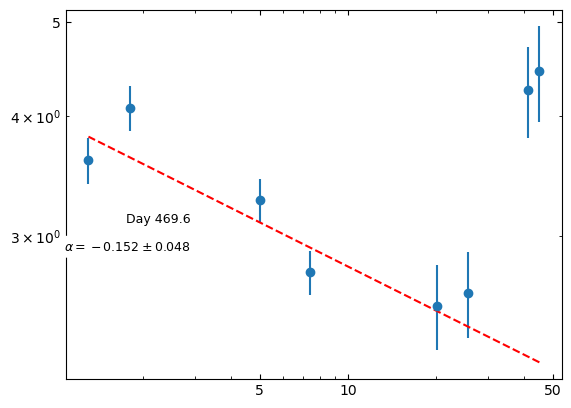

In [233]:
#plotting to check
fig,ax = plt.subplots()
mask = df26['Flux'] > 3 * df26['Error (gaussfit or image)']  # apply detection threshold
mask2 = df26['Flux'] < 3 * df26['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df26['Freq'][mask], df26['Flux'][mask], yerr=yerr26, fmt='o')
    ax.scatter(df26['Freq'][mask2], (df26['Flux'][mask2] + 3*df26['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 469.6', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df26['Freq'][mask], fit_model_weights26(df26['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.152 \\pm 0.048}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 603.3 (df27)

In [234]:
mask = df27['Flux'] > 3 * df27['Error (gaussfit or image)']  # apply detection threshold

x27 = df27['Freq'][mask].values.tolist()
y27 = df27['Flux'][mask].values.tolist()
yerr27 = df27['Error (gaussfit or image)'][mask].values.tolist()

In [235]:
yerr27 = error(yerr27, x27, y27)

In [236]:
#(work for anything with 3+ points)


PL27 =  PowerLaw1D(amplitude = y27[0], x_0= x27[0], alpha= -7) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit27 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model27 = fit27(PL27, x27, y27)


#weight is 1/error^2
y_weight27 = 1/ (np.power(yerr27, 2))  

# fit the data using the uncertainties as weights
fit_model_weights27 = fit27(PL27, x27, y27, weights=y_weight27)

fit_model_weights27


<PowerLaw1D(amplitude=3.92604678, x_0=109.06075937, alpha=-0.035101)>

In [237]:
fit27.fit_info

{'nfev': 22,
 'fvec': array([-2.92460789, -2.61786169, -0.65000657,  0.20377359,  2.49521614,
        -0.56853628, -3.74021385, -0.88368632]),
 'fjac': array([[-4.73062517e+02, -4.15802198e+01,  5.25403772e-02,
          9.70545287e-02,  6.47818581e-01,  7.02949483e-01,
          2.42061657e-01,  9.88580288e-02],
        [-4.15802198e+01, -7.45339121e+00,  9.41803548e-03,
          3.48662002e-01,  2.72862135e-02, -5.07604743e-01,
         -4.90817978e-01, -2.29058321e-01],
        [ 5.25403772e-02,  9.41803548e-03,  5.75368227e-18,
          7.53744904e-02,  8.95072074e-01, -0.00000000e+00,
          3.01497962e-01,  2.26123471e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-6.37616025e-05, -1.63812435e-05, -2.65365343e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 4.82304217e+28,  3.81693403e+31, -2.14928546e+11],
        [ 3.81693403e+31,  3.02070

In [238]:
#taking fvec
fvec27 = np.array([-2.92460789, -2.61786169, -0.65000657,  0.20377359,  2.49521614,
        -0.56853628, -3.74021385, -0.88368632])
var27 = np.var(fvec27)

#taking cov_x
cov_x27 = np.array([[ 4.82304217e+28,  3.81693403e+31, -2.14928546e+11],
        [ 3.81693403e+31,  3.02070454e+34, -1.70093491e+14],
        [-2.14928546e+11, -1.70093491e+14,  1.44494757e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag27 = stand(cov_x27*var27) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag27[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.02239162720280233


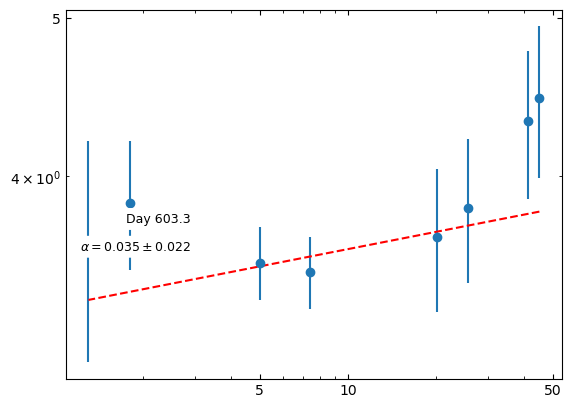

In [239]:
#plotting to check
fig,ax = plt.subplots()
mask = df27['Flux'] > 3 * df27['Error (gaussfit or image)']  # apply detection threshold
mask2 = df27['Flux'] < 3 * df27['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df27['Freq'][mask], df27['Flux'][mask], yerr=yerr27, fmt='o')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 603.3', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df27['Freq'][mask], fit_model_weights27(df27['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.035 \\pm 0.022}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 669.0 (df28)

In [240]:
mask = df28['Flux'] > 3 * df28['Error (gaussfit or image)']  # apply detection threshold

x28 = df28['Freq'][mask].values.tolist()
y28 = df28['Flux'][mask].values.tolist()
yerr28 = df28['Error (gaussfit or image)'][mask].values.tolist()

In [241]:
yerr28 = error(yerr28, x28, y28)

In [242]:
#(work for anything with 3+ points)


PL28 =  PowerLaw1D(amplitude = y28[0], x_0= x28[0], alpha= -8.5) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit28 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model28 = fit28(PL28, x28, y28)


#weight is 1/error^2
y_weight28 = 1/ (np.power(yerr28, 2))  

# fit the data using the uncertainties as weights
fit_model_weights28 = fit28(PL28, x28, y28, weights=y_weight28)

fit_model_weights28


<PowerLaw1D(amplitude=3.1904399, x_0=67.75244553, alpha=-0.00121545)>

In [243]:
fit28.fit_info

{'nfev': 26,
 'fvec': array([-4.94048134, -3.65931011,  2.09840154,  0.45366064,  1.092968  ,
        -1.0983443 , -0.41745167, -1.38116903]),
 'fjac': array([[-4.01269782e+02, -5.36179549e+01,  3.11563656e-03,
          9.45086005e-02,  6.84030315e-01,  7.12687900e-01,
          8.55236519e-02,  2.84506915e-02],
        [-5.36179549e+01, -1.02096494e+01,  5.93263153e-04,
          4.55359703e-01,  1.05156260e-01, -4.94426353e-01,
         -1.74305348e-01, -6.60010437e-02],
        [ 3.11563656e-03,  5.93263153e-04,  2.30392962e-19,
          2.35294118e-01, -0.00000000e+00,  9.41176471e-01,
          5.88235294e-02, -0.00000000e+00]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([-6.73330167e-04, -1.28342995e-04, -2.46979671e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[6.36113596e+28, 1.09470760e+33, 3.37371949e+12],
        [1.09470760e+33, 1.88391622e+

In [244]:
#taking fvec
fvec28 = np.array([-4.94048134, -3.65931011,  2.09840154,  0.45366064,  1.092968  ,
        -1.0983443 , -0.41745167, -1.38116903])
var28 = np.var(fvec28)

#taking cov_x
cov_x28 = np.array([[6.36113596e+28, 1.09470760e+33, 3.37371949e+12],
        [1.09470760e+33, 1.88391622e+37, 5.80593839e+16],
        [3.37371949e+12, 5.80593839e+16, 3.56428147e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag28 = stand(cov_x28*var28) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag28[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.04178293176824778


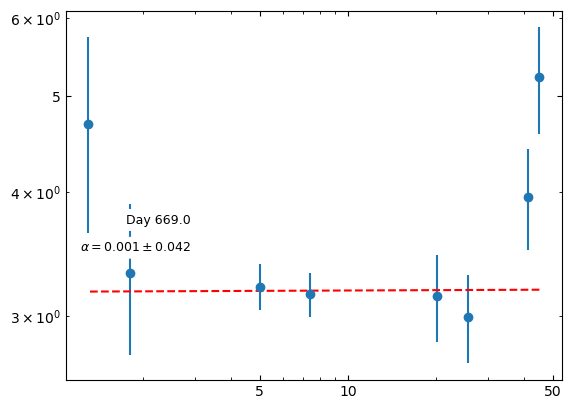

In [245]:
#plotting to check
fig,ax = plt.subplots()
mask = df28['Flux'] > 3 * df28['Error (gaussfit or image)']  # apply detection threshold
mask2 = df28['Flux'] < 3 * df28['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df28['Freq'][mask], df28['Flux'][mask], yerr=yerr28, fmt='o')
    ax.scatter(df28['Freq'][mask2], (df28['Flux'][mask2] + 3*df28['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 669.0', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df28['Freq'][mask], fit_model_weights28(df28['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = 0.001 \\pm 0.042}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


### Day 769.6 (df29)

In [246]:
mask = df29['Flux'] > 3 * df29['Error (gaussfit or image)']  # apply detection threshold

x29 = df29['Freq'][mask].values.tolist()
y29 = df29['Flux'][mask].values.tolist()
yerr29 = df29['Error (gaussfit or image)'][mask].values.tolist()

In [247]:
yerr29 = error(yerr29, x29, y29)

In [248]:
#(work for anything with 3+ points)


PL29 =  PowerLaw1D(amplitude = y29[0], x_0= x29[0], alpha= -3) 

#Initialize fitters
#setting calc_uncertainties=True to output errors on measurement 

fit29 = fitting.LevMarLSQFitter(calc_uncertainties=True)

#Fit the data w/o weights
fit_model29 = fit29(PL29, x29, y29)


#weight is 1/error^2
y_weight29 = 1/ (np.power(yerr29, 2))  

# fit the data using the uncertainties as weights
fit_model_weights29 = fit29(PL29, x29, y29, weights=y_weight29)

fit_model_weights29


<PowerLaw1D(amplitude=2.65171933, x_0=64.72946823, alpha=0.03461675)>

In [249]:
fit29.fit_info

{'nfev': 20,
 'fvec': array([ 0.19202563, -1.6803929 , -2.54912414, -1.76532582,  2.76716135,
        -0.70385145, -4.21819949,  0.85403778]),
 'fjac': array([[-4.90498796e+02, -7.59317674e+01, -1.07486403e-01,
          7.62126712e-02,  6.31111002e-01,  6.88131825e-01,
          2.68053693e-01,  2.15644398e-01],
        [-7.59317674e+01, -1.75744017e+01, -2.48777196e-02,
          3.27729529e-01,  1.02727775e-01, -3.98543930e-01,
         -4.69101681e-01, -4.30097591e-01],
        [-1.07486403e-01, -2.48777196e-02,  7.86625849e-18,
          2.20527139e-01,  6.06449631e-01, -2.20527139e-01,
          6.61581416e-01, -2.20527139e-01]]),
 'ipvt': array([3, 1, 2], dtype=int32),
 'qtf': array([2.69086300e-04, 3.76714672e-05, 2.06335783e+00]),
 'message': 'Both actual and predicted relative reductions in the sum of squares\n  are at most 0.000000',
 'ierr': 1,
 'param_jac': None,
 'param_cov': array([[ 3.23834871e+28, -2.28767114e+31, -8.81028745e+11],
        [-2.28767114e+31,  1.61608267

In [250]:
#taking fvec
fvec29 = np.array([ 0.19202563, -1.6803929 , -2.54912414, -1.76532582,  2.76716135,
        -0.70385145, -4.21819949,  0.85403778])
var29 = np.var(fvec29)

#taking cov_x
cov_x29 = np.array([[ 3.23834871e+28, -2.28767114e+31, -8.81028745e+11],
        [-2.28767114e+31,  1.61608267e+34,  6.22386349e+14],
        [-8.81028745e+11,  6.22386349e+14,  1.05716595e-04]])

def stand(cov):
    diag = np.diagonal(cov)
    sd1 = np.sqrt(diag[0])
    sd2 = np.sqrt(diag[1])
    sd3 = np.sqrt(diag[2])
    return(sd1,sd2,sd3)

diag29 = stand(cov_x29*var29) 

#The last diagonal element corresponds to alpha
#So here we are calculating the standard deviation on the slope

#print(diag)  #prints standard deviations of all three variances

print('The error/standard deviation is', diag29[2]) #Just showing the standard deviation on the slope



The error/standard deviation is 0.020832631609869753


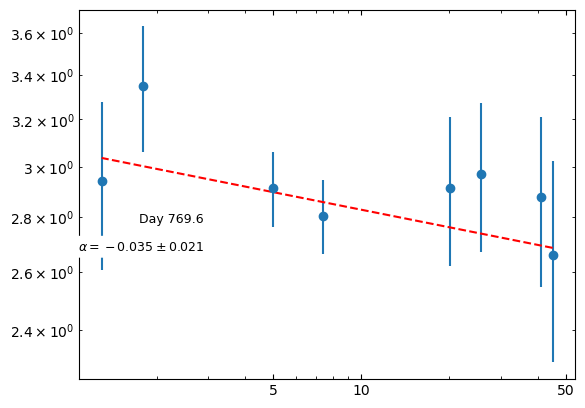

In [251]:
#plotting to check
fig,ax = plt.subplots()
mask = df29['Flux'] > 3 * df29['Error (gaussfit or image)']  # apply detection threshold
mask2 = df29['Flux'] < 3 * df29['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax.errorbar(df29['Freq'][mask], df29['Flux'][mask], yerr=yerr29, fmt='o')
    ax.scatter(df29['Freq'][mask2], (df29['Flux'][mask2] + 3*df29['Error (gaussfit or image)'][mask2]), marker='v')
    ax.set_xscale('log')
    ax.set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax.set_yscale('log')
    ax.set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax.annotate('Day 769.6', xy=(90, 120), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax.plot(df29['Freq'][mask], fit_model_weights29(df29['Freq'][mask]), 'r--')
    ax.annotate('${\u03B1 = -0.035 \\pm 0.021}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

plt.show();


## Now all together with their alpha

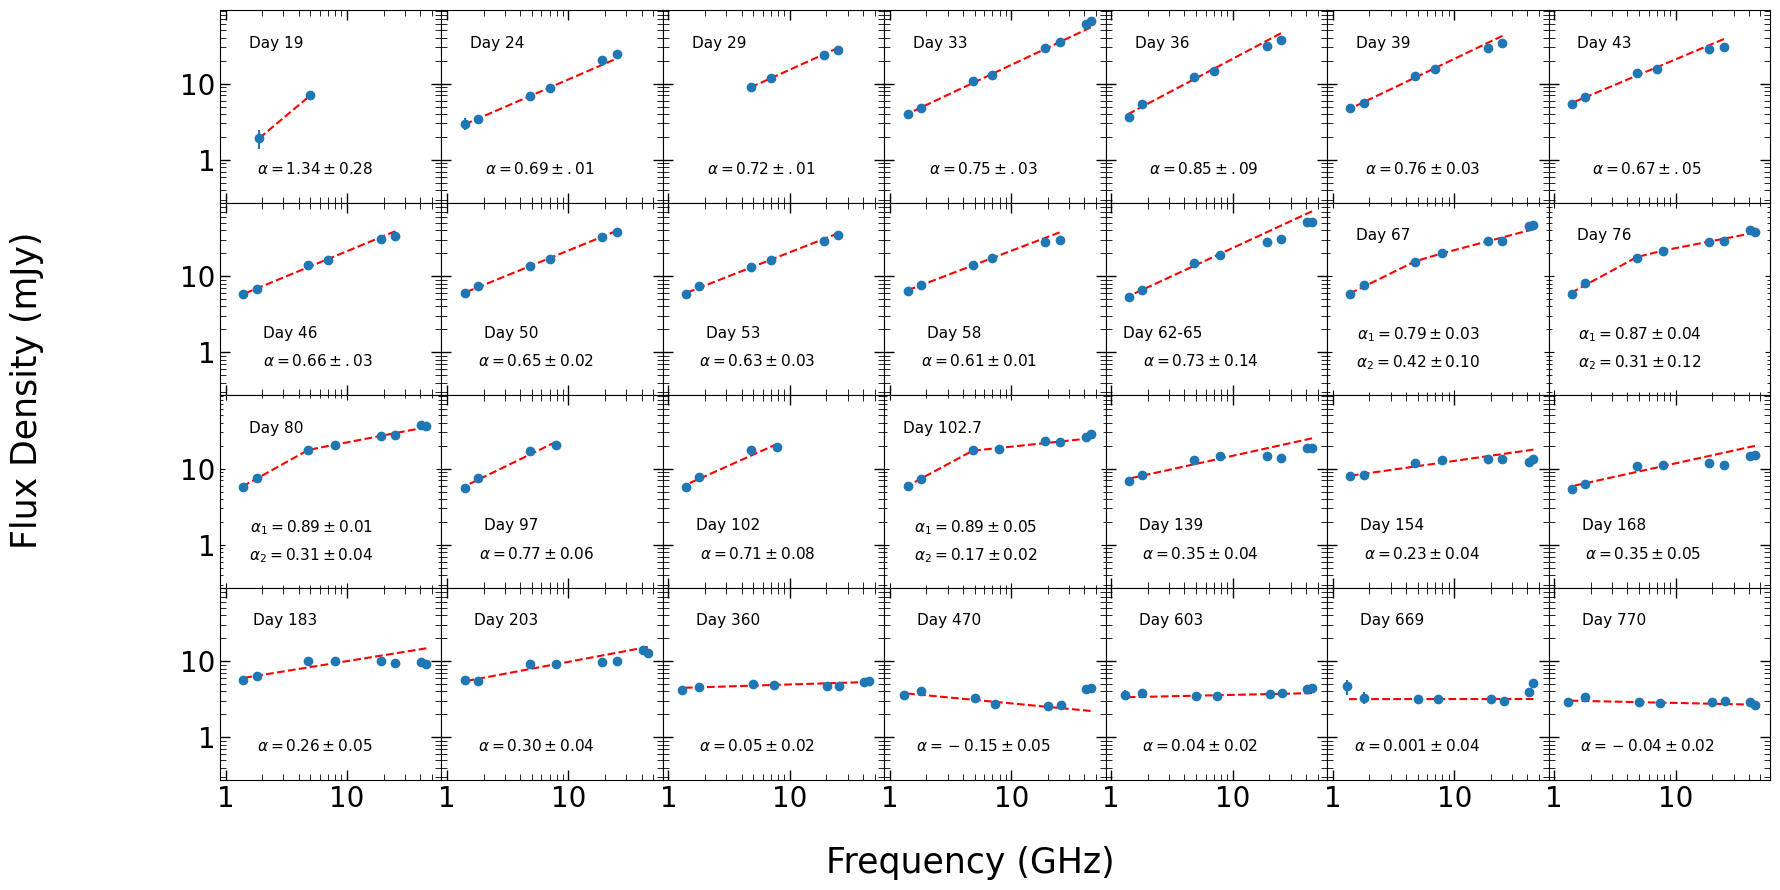

In [261]:
#CHANGE TO 4X7 TABLE, NO DAY 17, COMBIENS 13

fig, ax = plt.subplots(4, 7, sharex='all', sharey='all',squeeze=True, width_ratios=None, height_ratios=None)
fig.set_size_inches(20,10)
fig.subplots_adjust(hspace=0, wspace=0)

#first row
#df 2
ax[0, 0].errorbar(df2['Freq'], df2['Flux'], yerr=yerr2,fmt='o' )
#ax[0,1].legend(loc='upper left', edgecolor='1', markerscale = 0, handlelength=0,  handletextpad=0)
ax[0,0].set_xscale('log')
ax[0,0].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 20)
ax[0,0].set_yscale('log')
ax[0,0].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 20)
ax[0,0].annotate('Day 19', xy=(60, 120), xycoords='axes points', size=11, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[0,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[0,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[0,0].plot(df2['Freq'][mask], fit_model_weights2(df2['Freq'][mask]), 'r--')
ax[0,0].annotate('${\u03B1 = 1.34 \\pm 0.28}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[0, 1].errorbar(df3['Freq'], df3['Flux'], yerr=yerr3,fmt='o')
#ax[0,1].legend(loc='upper left', edgecolor='1', markerscale = 0, handlelength=0,  handletextpad=0)
ax[0,1].set_xscale('log')
ax[0,1].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 11)
ax[0,1].set_yscale('log')
ax[0,1].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 11)
ax[0,1].annotate('Day 24', xy=(60, 120), xycoords='axes points',size=11, ha='right', va='top',bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[0,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[0,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[0,1].plot(df3['Freq'][mask], fit_model_weights(df3['Freq'][mask]), 'r--')
ax[0,1].annotate('${\u03B1 = 0.69 \\pm .01}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[0, 2].errorbar(df4['Freq'], df4['Flux'], yerr=yerr4,fmt='o' )
ax[0,2].set_xscale('log')
ax[0,2].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 11)
ax[0,2].set_yscale('log')
ax[0,2].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 11)
ax[0,2].annotate('Day 29', xy=(60, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[0,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[0,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[0,2].plot(df4['Freq'][mask], fit_model_weights4(df4['Freq'][mask]), 'r--')
ax[0,2].annotate('${\u03B1 = 0.72 \\pm .01}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[0, 3].errorbar(df5['Freq'], df5['Flux'], yerr=yerr5,fmt='o' )
ax[0,3].set_xscale('log')
ax[0,3].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 11)
ax[0,3].set_yscale('log')
ax[0,3].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 11)
ax[0,3].annotate('Day 33', xy=(60, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[0,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[0,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[0,3].plot(df5['Freq'][mask], fit_model_weights5(df5['Freq'][mask]), 'r--')
ax[0,3].annotate('${\u03B1 = 0.75 \\pm .03}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))



ax[0, 4].errorbar(df6['Freq'], df6['Flux'], yerr=yerr6,fmt='o')
ax[0,4].set_xscale('log')
ax[0,4].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 20)
ax[0,4].set_yscale('log')
ax[0,4].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 20)
ax[0,4].annotate('Day 36', xy=(60, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[0,4].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[0,4].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[0,4].plot(df6['Freq'][mask], fit_model_weights6(df6['Freq'][mask]), 'r--')
ax[0,4].annotate('${\u03B1 = 0.85 \\pm .09}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[0, 5].errorbar(df7['Freq'], df7['Flux'], yerr=yerr7,fmt='o')
ax[0,5].set_xscale('log')
ax[0,5].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 11)
ax[0,5].set_yscale('log')
ax[0,5].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 11)
ax[0,5].annotate('Day 39', xy=(60, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[0,5].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[0,5].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[0,5].plot(df7['Freq'][mask], fit_model_weights7(df7['Freq'][mask]), 'r--')
ax[0,5].annotate('${\u03B1 = 0.76 \\pm 0.03}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[0,6].errorbar(df8['Freq'], df8['Flux'], yerr=yerr8,fmt='o')
ax[0,6].set_xscale('log')
ax[0,6].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 11)
ax[0,6].set_yscale('log')
ax[0,6].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 11)
ax[0,6].annotate('Day 43', xy=(60, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[0,6].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[0,6].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[0,6].plot(df8['Freq'][mask], fit_model_weights8(df8['Freq'][mask]), 'r--')
ax[0,6].annotate('${\u03B1 = 0.67 \\pm .05}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))




#Second row

ax[1,0].errorbar(df9['Freq'], df9['Flux'], yerr=yerr9,fmt='o')
ax[1,0].set_xscale('log')
ax[1,0].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 20)
ax[1,0].set_yscale('log')
ax[1,0].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 20)
ax[1,0].annotate('Day 46', xy=(70, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[1,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[1,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[1,0].plot(df9['Freq'][mask], fit_model_weights9(df9['Freq'][mask]), 'r--')
ax[1,0].annotate('${\u03B1 = 0.66 \\pm .03}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[1,1].errorbar(df10['Freq'], df10['Flux'], yerr=yerr10,fmt='o')
ax[1,1].set_xscale('log')
ax[1,1].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 11)
ax[1,1].set_yscale('log')
ax[1,1].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 11)
ax[1,1].annotate('Day 50', xy=(70, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[1,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[1,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[1,1].plot(df10['Freq'][mask], fit_model_weights10(df10['Freq'][mask]), 'r--')
ax[1,1].annotate('${\u03B1 = 0.65 \\pm 0.02}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[1,2].errorbar(df11['Freq'], df11['Flux'], yerr=yerr11,fmt='o')
ax[1,2].set_xscale('log')
ax[1,2].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 20)
ax[1,2].set_yscale('log')
ax[1,2].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 20)
ax[1,2].annotate('Day 53', xy=(70, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[1,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[1,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[1,2].plot(df11['Freq'][mask], fit_model_weights11(df11['Freq'][mask]), 'r--')
ax[1,2].annotate('${\u03B1 = 0.63 \\pm 0.03}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[1,3].errorbar(df12['Freq'], df12['Flux'], yerr=yerr12,fmt='o')
ax[1,3].set_xscale('log')
ax[1,3].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 11)
ax[1,3].set_yscale('log')
ax[1,3].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 11)
ax[1,3].annotate('Day 58', xy=(70, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[1,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[1,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[1,3].plot(df12['Freq'][mask], fit_model_weights12(df12['Freq'][mask]), 'r--')
ax[1,3].annotate('${\u03B1 = 0.61 \\pm 0.01}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

#just df13
ax[1,4].errorbar(df13['Freq'], df13['Flux'], yerr=yerr13, fmt='o')
ax[1,4].set_xscale('log')
ax[1,4].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 11)
ax[1,4].set_yscale('log')
ax[1,4].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 11)
ax[1,4].annotate('Day 62-65', xy=(70, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[1,4].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[1,4].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[1,4].plot(df13['Freq'][mask], fit_model_weights13(df13['Freq'][mask]), 'r--')
ax[1,4].annotate('${\u03B1 = 0.73 \\pm 0.14}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


mask = df14['Flux'] > 3 * df14['Error (gaussfit or image)']  # apply detection threshold
mask2 = df14['Flux'] < 3 * df14['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,5].errorbar(df14['Freq'][mask], df14['Flux'][mask], yerr=yerr14, fmt='o')
    ax[1,5].scatter(df14['Freq'][mask2], (df14['Flux'][mask2] + 3*df14['Error (gaussfit or image)'][mask2]), marker='v')
    ax[1,5].set_xscale('log')
    ax[1,5].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,5].set_yscale('log')
    ax[1,5].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,5].annotate('Day 67', xy=(60, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,5].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[1,5].plot(df14['Freq'][mask], fw_BPL14(df14['Freq'][mask]), 'r--')
    ax[1,5].annotate('${\u03B1_1 = 0.79 \\pm 0.03}$', xy=(110, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,5].annotate('${\u03B1_2 = 0.42 \\pm 0.10}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

"""
ax[1,5].errorbar(df14['Freq'], df14['Flux'], yerr=yerr14,fmt='^')
ax[1,5].set_xscale('log')
ax[1,5].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 11)
ax[1,5].set_yscale('log')
ax[1,5].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 11)
ax[1,5].annotate('Day 67', xy=(70, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[1,5].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[1,5].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[1,5].plot(df14['Freq'][mask], fit_model_weights14(df14['Freq'][mask]), 'r--')
ax[1,5].annotate('${\u03B1 = 0.690 \\pm 0.051}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
""";

mask = df15['Flux'] > 3 * df15['Error (gaussfit or image)']  # apply detection threshold
mask2 = df15['Flux'] < 3 * df15['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[1,6].errorbar(df15['Freq'][mask], df15['Flux'][mask], yerr=yerr15, fmt='o')
    ax[1,6].scatter(df15['Freq'][mask2], (df15['Flux'][mask2] + 3*df15['Error (gaussfit or image)'][mask2]), marker='v')
    ax[1,6].set_xscale('log')
    ax[1,6].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[1,6].set_yscale('log')
    ax[1,6].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[1,6].annotate('Day 76', xy=(60, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,6].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[1,6].plot(df15['Freq'][mask], fw_BPL15(df15['Freq'][mask]), 'r--')
    #ax.annotate('${\u03B1 = 0.694 \\pm 0.050}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,6].annotate('${\u03B1_1 = 0.87 \\pm 0.04}$', xy=(110, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[1,6].annotate('${\u03B1_2 = 0.31 \\pm 0.12}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

"""
ax[1,6].errorbar(df15['Freq'], df15['Flux'], yerr=yerr15,fmt='^')
ax[1,6].set_xscale('log')
ax[1,6].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 20)
ax[1,6].set_yscale('log')
ax[1,6].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 20)
ax[1,6].annotate('Day 76', xy=(70, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[1,6].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[1,6].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[1,6].plot(df15['Freq'][mask], fit_model_weights15(df15['Freq'][mask]), 'r--')
ax[1,6].annotate('${\u03B1 = 0.694 \\pm 0.050}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
""";




#third row
"""
ax[2,0].errorbar(df16['Freq'], df16['Flux'], yerr=yerr16,fmt='o')
ax[2,0].set_xscale('log')
ax[2,0].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 11)
ax[2,0].set_yscale('log')
ax[2,0].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 11)
ax[2,0].annotate('Day 80', xy=(70, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[2,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[2,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[2,0].plot(df16['Freq'][mask], fit_model_weights16(df16['Freq'][mask]), 'r--')
ax[2,0].annotate('${\u03B1 = 0.678 \\pm 0.049}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
""";
mask = df16['Flux'] > 3 * df16['Error (gaussfit or image)']  # apply detection threshold
mask2 = df16['Flux'] < 3 * df16['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,0].errorbar(df16['Freq'][mask], df16['Flux'][mask], yerr=yerr16, fmt='o')
    ax[2,0].scatter(df16['Freq'][mask2], (df16['Flux'][mask2] + 3*df16['Error (gaussfit or image)'][mask2]), marker='v')
    ax[2,0].set_xscale('log')
    ax[2,0].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'], size=20)
    ax[2,0].set_yscale('log')
    ax[2,0].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'], size=20)
    ax[2,0].annotate('Day 80', xy=(60, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,0].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[2,0].plot(df16['Freq'][mask], fw_BPL16(df16['Freq'][mask]), 'r--')
    
    #ax.annotate('${\u03B1 = 0.678 \\pm 0.049}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

    ax[2,0].annotate('${\u03B1_1 = 0.89 \\pm 0.01}$', xy=(110, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,0].annotate('${\u03B1_2 = 0.31 \\pm 0.04}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    

ax[2,1].errorbar(df17['Freq'], df17['Flux'], yerr=yerr17,fmt='o')
ax[2,1].set_xscale('log')
ax[2,1].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 11)
ax[2,1].set_yscale('log')
ax[2,1].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 11)
ax[2,1].annotate('Day 97', xy=(70, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[2,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[2,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[2,1].plot(df17['Freq'][mask], fit_model_weights17(df17['Freq'][mask]), 'r--')
ax[2,1].annotate('${\u03B1 = 0.77 \\pm 0.06}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[2,2].errorbar(df18['Freq'], df18['Flux'], yerr=yerr18,fmt='o')
ax[2,2].set_xscale('log')
ax[2,2].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 11)
ax[2,2].set_yscale('log')
ax[2,2].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 11)
ax[2,2].annotate('Day 102', xy=(70, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[2,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[2,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[2,2].plot(df18['Freq'][mask], fit_model_weights18(df18['Freq'][mask]), 'r--')
ax[2,2].annotate('${\u03B1 = 0.71 \\pm 0.08}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))

"""
ax[2,3].errorbar(df19['Freq'], df19['Flux'], yerr=yerr19,fmt='o')
ax[2,3].set_xscale('log')
ax[2,3].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 11)
ax[2,3].set_yscale('log')
ax[2,3].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 11)
ax[2,3].annotate('Day 103', xy=(70, 100), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[2,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[2,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[2,3].plot(df19['Freq'][mask], fit_model_weights19(df19['Freq'][mask]), 'r--')
ax[2,3].annotate('${\u03B1 = 0.584 \\pm 0.085}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
""";
mask = df19['Flux'] > 3 * df19['Error (gaussfit or image)']  # apply detection threshold
mask2 = df19['Flux'] < 3 * df19['Error (gaussfit or image)']  # apply detection threshold
if mask.any():  # proceed only if at least one detection
    ax[2,3].errorbar(df19['Freq'][mask], df19['Flux'][mask], yerr=yerr19, fmt='o')
    ax[2,3].scatter(df19['Freq'][mask2], (df19['Flux'][mask2] + 3*df19['Error (gaussfit or image)'][mask2]), marker='v')
    ax[2,3].set_xscale('log')
    ax[2,3].set_xticks([1, 5, 10, 50], labels=['1', '5', '10', '50'])
    ax[2,3].set_yscale('log')
    ax[2,3].set_yticks([1, 5, 10, 20, 50], labels=['1', '5', '10', '20', '50'])
    ax[2,3].annotate('Day 102.7', xy=(70, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,3].tick_params(axis='both', which='both', direction='in', top=True, right=True)
    ax[2,3].plot(df19['Freq'][mask], fw_BPL19(df19['Freq'][mask]), 'r--')
    #ax.annotate('${\u03B1 = 0.584 \\pm 0.085}$', xy=(90, 100), xycoords='axes points', size=9, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,3].annotate('${\u03B1_1 = 0.89 \\pm 0.05}$', xy=(110, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    ax[2,3].annotate('${\u03B1_2 = 0.17 \\pm 0.02}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
    

ax[2,4].errorbar(df20['Freq'], df20['Flux'], yerr=yerr20,fmt='o')
ax[2,4].set_xscale('log')
ax[2,4].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 20)
ax[2,4].set_yscale('log')
ax[2,4].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 20)
ax[2,4].annotate('Day 139', xy=(70, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[2,4].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[2,4].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[2,4].plot(df20['Freq'][mask], fit_model_weights20(df20['Freq'][mask]), 'r--')
ax[2,4].annotate('${\u03B1 = 0.35 \\pm 0.04}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[2,5].errorbar(df21['Freq'], df21['Flux'], yerr=yerr21,fmt='o')
ax[2,5].set_xscale('log')
ax[2,5].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 11)
ax[2,5].set_yscale('log')
ax[2,5].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 11)
ax[2,5].annotate('Day 154', xy=(70, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[2,5].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[2,5].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[2,5].plot(df21['Freq'][mask], fit_model_weights21(df21['Freq'][mask]), 'r--')
ax[2,5].annotate('${\u03B1 = 0.23 \\pm 0.04}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[2,6].errorbar(df22['Freq'], df22['Flux'], yerr=yerr22,fmt='o')
ax[2,6].set_xscale('log')
ax[2,6].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 11)
ax[2,6].set_yscale('log')
ax[2,6].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 11)
ax[2,6].annotate('Day 168', xy=(70, 50), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[2,6].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[2,6].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[2,6].plot(df22['Freq'][mask], fit_model_weights22(df22['Freq'][mask]), 'r--')
ax[2,6].annotate('${\u03B1 = 0.35 \\pm 0.05}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))






#fourth row

ax[3,0].errorbar(df23['Freq'], df23['Flux'], yerr=yerr23,fmt='o')
ax[3,0].set_xscale('log')
ax[3,0].set_xlim(left=0.9)
ax[3,0].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 20)
ax[3,0].set_yscale('log')
ax[3,0].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 20)
ax[3,0].annotate('Day 183', xy=(70, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[3,0].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[3,0].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[3,0].plot(df23['Freq'][mask], fit_model_weights23(df23['Freq'][mask]), 'r--')
ax[3,0].annotate('${\u03B1 = 0.26 \\pm 0.05}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[3,1].errorbar(df24['Freq'], df24['Flux'], yerr=yerr24,fmt='o')
ax[3,1].set_xscale('log')
ax[3,1].set_xlim(left=0.9)
ax[3,1].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 20)
ax[3,1].set_yscale('log')
ax[3,1].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 20)
ax[3,1].annotate('Day 203', xy=(70, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[3,1].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[3,1].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[3,1].plot(df24['Freq'][mask], fit_model_weights24(df24['Freq'][mask]), 'r--')
ax[3,1].annotate('${\u03B1 = 0.30 \\pm 0.04}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[3,2].errorbar(df25['Freq'], df25['Flux'], yerr=yerr25,fmt='o')
ax[3,2].set_xscale('log')
ax[3,2].set_xlim(left=0.9)
ax[3,2].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 20)
ax[3,2].set_yscale('log')
ax[3,2].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 20)
ax[3,2].annotate('Day 360', xy=(70, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[3,2].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[3,2].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[3,2].plot(df25['Freq'][mask], fit_model_weights25(df25['Freq'][mask]), 'r--')
ax[3,2].annotate('${\u03B1 = 0.05 \\pm 0.02}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[3,3].errorbar(df26['Freq'], df26['Flux'], yerr=yerr26,fmt='o')
ax[3,3].set_xscale('log')
ax[3,3].set_xlim(left=0.9)
ax[3,3].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 20)
ax[3,3].set_yscale('log')
ax[3,3].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 20)
ax[3,3].annotate('Day 470', xy=(70, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[3,3].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[3,3].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[3,3].plot(df26['Freq'][mask], fit_model_weights26(df26['Freq'][mask]), 'r--')
ax[3,3].annotate('${\u03B1 = -0.15 \\pm 0.05}$', xy=(120, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[3,4].errorbar(df27['Freq'], df27['Flux'], yerr=yerr27,fmt='o')
ax[3,4].set_xscale('log')
ax[3,4].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 20)
ax[3,4].set_yscale('log')
ax[3,4].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 20)
ax[3,4].annotate('Day 603', xy=(70, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[3,4].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[3,4].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[3,4].plot(df27['Freq'][mask], fit_model_weights27(df27['Freq'][mask]), 'r--')
ax[3,4].annotate('${\u03B1 = 0.04 \\pm 0.02}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[3,5].errorbar(df28['Freq'], df28['Flux'], yerr=yerr28,fmt='o')
ax[3,5].set_xscale('log')
ax[3,5].set_xlim(left=0.9)
ax[3,5].set_xticks([1,5,10,50], labels = ['1','5','10','50'], fontsize = 20)
ax[3,5].set_yscale('log')
ax[3,5].set_yticks([1,5,10,20,50, 100], labels = ['1','5','10','20','50', '100'], fontsize = 20)
ax[3,5].annotate('Day 669', xy=(70, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[3,5].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[3,5].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[3,5].plot(df28['Freq'][mask], fit_model_weights28(df28['Freq'][mask]), 'r--')
ax[3,5].annotate('${\u03B1 = 0.001 \\pm 0.04}$', xy=(110, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


ax[3,6].errorbar(df29['Freq'], df29['Flux'], yerr=yerr29,fmt='o')
ax[3,6].set_xscale('log')
ax[3,6].set_xticks([1,10], labels = ['1','10'], fontsize = 20)
ax[3,6].set_xlim(left=0.9)
ax[3,6].set_yscale('log')
ax[3,6].set_yticks([1,10, 100], labels = ['1','10','100'], fontsize = 20)
ax[3,6].annotate('Day 770', xy=(70, 120), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))
ax[3,6].tick_params(which='minor', length =4, direction = 'in', top=True, labeltop=False, bottom=True, labelbottom=False, right = True,labelright = False)
ax[3,6].tick_params(which='major', length=7, direction = 'in', width =1, top=True, labeltop=False, bottom=True, labelbottom=True, right = True, labelright = False)
ax[3,6].plot(df29['Freq'][mask], fit_model_weights29(df29['Freq'][mask]), 'r--')
ax[3,6].annotate('${\u03B1 = -0.04 \\pm 0.02}$', xy=(120, 30), xycoords='axes points', size=11, ha='right', va='top', bbox=dict(boxstyle='round', fc='w', ec="w"))


#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlabel("Frequency (GHz)")
#ax.set_ylabel("Flux Density (mJy)")

fig.supxlabel("Frequency (GHz)", fontsize = 25)
fig.supylabel("Flux Density (mJy)", fontsize = 25)
plt.savefig("V407_SI.png")
#plt.legend()
plt.show();